# 양천구 데이터 분석

# <목차>

## 1. 양천구 주차장 정보 크롤링

## 2. 주차장 주변 정보 데이터 EDA & 분석

## 3. 거주자 우선 주차장 모델링 & 방문자 우선 주차장 모델링

### <font color='red'> ★★★ 데이터가 없으면 실행되지 않습니다! ★★★

## 1. 양천구 주차장 정보 크롤링

### 1-1. 필요한 패키지 import

In [1]:
## 크롤링용 패키지
from selenium.webdriver import Chrome
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time

## 전처리용 패키지
import re
import pandas as pd
import numpy as np
from scipy.stats import skew

## 오류메시지
import warnings
warnings.filterwarnings('ignore')

## 시각화용 패키지
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager,rc
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
import matplotlib
matplotlib.rc('font',family=font_name)
%matplotlib inline

In [7]:
browser = Chrome()

In [8]:
url = "https://map.kakao.com/" # 카카오맵 이용

In [24]:
parking_lot_name_list = [] # 주차장명 리스트
parking_lot_addr_list = [] # 주차장 주소 및 지번 리스트

url_list = [] # 각 주차장별 세부 정보를 위한 주차장별 url 리스트

In [25]:
parking_lot = ['양천구 목동 주차장', '양천구 신월동 주차장', '양천구 신정동 주차장'] # 검색할 주차장 목록

In [26]:
### 전체 주차장 갯수가 75의 배수가 아닐 때 몫에 1을 더한 수가 해당 검색어의 결과 페이지 다음페이지 버튼 클릭 수
### ex> 438건일 경우 데이터 15개씩 총 30페이지가 필요한데 한번에 5페이지까지 나오므로 다음버튼 누르는 횟수 6(5 + 1)이다.
### +1 안해주면 작동 x
def cal_page(x):
    if x % 75 > 0 :
        need_page = x // 75 + 1
    else :
        need_page = x // 75 
    return need_page

### 1-2. 주차장 이름 및 주소 크롤링

In [28]:
for name in parking_lot :    
    browser.get(url)
    element = browser.find_element_by_id("search.keyword.query") # 검색어 입력란
    element.send_keys(name) # 입력란에 검색어 입력
    element.send_keys(Keys.RETURN) # 검색 버튼 클릭
    time.sleep(.3)
    parking_lot_count = int(browser.find_element_by_css_selector("#info\.search\.place\.cnt").text) # 행정동별 주차장 검색 결과 수
    print('전체 주차장 수 {}'.format(parking_lot_count))
    com_num = 0
    browser.find_element_by_css_selector("#info\.search\.place\.more").click() # '장소 더 보기' 버튼 클릭
    time.sleep(.2)
    while True :
        com_num += 1
        print(com_num)
        if com_num <= cal_page(parking_lot_count) :
            try : 
                for page in range(1, 6):
                    browser.find_element_by_css_selector("#info\.search\.page\.no{}".format(page)).click()
                    time.sleep(.6)
                    html = browser.page_source
                    soup = BeautifulSoup(html, 'html.parser')
                    url_count = len(soup.select("a.moreview")) # 주차장별 세부정보가 있는 페이지의 url 추출
                    for i in range(url_count) :
                        url_href = soup.select("a.moreview")[i]['href']
                        url_list.append(url_href)
                    for i in range(15):
                        try :
                            parking_lot_name = browser.find_elements_by_css_selector("a.link_name")[i].text # 주차장명
                            parking_lot_name_list.append(parking_lot_name) # 주차장명을 주차장명 리스트에 추가
                            print('1. 주차장명', parking_lot_name)

                            parking_lot_addr = browser.find_elements_by_css_selector("div.addr")[i].text # 주차장 주소 및 지번
                            parking_lot_addr_list.append(parking_lot_addr) # 주차장 주소 및 지번 리스트에 추가
                            print('2. 주소명' ,parking_lot_addr)
                        except :
                            break
                try :
                    browser.find_element_by_css_selector("#info\.search\.page\.next").click()
                except :
                    break
            except :
                break
        else :
            break

전체 주차장 수 109
1
1. 주차장명 목동주차장
2. 주소명 서울 양천구 신월로 353
(지번) 신정동 982-5
1. 주차장명 목동공영주차장
2. 주소명 서울 양천구 목동동로 298
(지번) 목동 915
1. 주차장명 이마트 목동점 주차장
2. 주소명 서울 양천구 오목로 299
(지번) 목동 962
1. 주차장명 목동유료주차장
2. 주소명 서울 양천구 목동로 183
(지번) 신정동 995-2
1. 주차장명 목동힘찬병원 주차장
2. 주소명 서울 양천구 신목로 120
(지번) 목동 404-3
1. 주차장명 이대목동병원 주차장
2. 주소명 서울 양천구 안양천로 1071
(지번) 목동 911-1
1. 주차장명 목동파라곤 주차장
2. 주소명 서울 양천구 목동서로 155
(지번) 목동 917
1. 주차장명 목동로데오 주차장
2. 주소명 서울 양천구 목동로 207
(지번) 신정동 900-19
1. 주차장명 현대백화점 목동점 주차장
2. 주소명 서울 양천구 목동동로 257
(지번) 목동 916
1. 주차장명 목동트윈빌 주차장
2. 주소명 서울 양천구 목동동로 339
(지번) 목동 905-22
1. 주차장명 목동홈플러스 주차장
2. 주소명 서울 양천구 목동서로 170
(지번) 목동 919-7
1. 주차장명 목동로데오유료주차장
2. 주소명 서울 양천구 신정동 900-8
1. 주차장명 KT목동타워 주차장
2. 주소명 서울 양천구 목동 924-5
1. 주차장명 목동체비지공영주차장
2. 주소명 서울 양천구 목동 908-27
1. 주차장명 목동이스타빌주차장
2. 주소명 서울 양천구 목동서로 377
(지번) 신정동 323-23
1. 주차장명 목동종합운동장 주차장
2. 주소명 서울 양천구 안양천로 939
(지번) 목동 914
1. 주차장명 목동종합운동장 주차장2
2. 주소명 서울 양천구 안양천로 939
(지번) 목동 914-8
1. 주차장명 목동종합운동장 주차장1
2. 주소명 서울 양천구 목동 914-2
1. 주차장명 목동타운홀공영주차장
2. 주소명 서울 양천구 목동동로 345
(지

1. 주차장명 노외유료주차장
2. 주소명 서울 양천구 신월동 59-1
1. 주차장명 지하주차장
2. 주소명 서울 양천구 오목로13길 33
(지번) 신월동 465-5
1. 주차장명 주차장
2. 주소명 서울 양천구 국회대로 39
(지번) 신월동 238-6
1. 주차장명 지하주차장
2. 주소명 서울 양천구 남부순환로56길 15
(지번) 신월동 1058
1. 주차장명 목동센트럴아이파크위브 1단지상가
2. 주소명 서울 양천구 신월동 551-16
1. 주차장명 주차장
2. 주소명 서울 양천구 곰달래로5길 76
(지번) 신월동 97-24
1. 주차장명 주차장
2. 주소명 서울 양천구 신월동 828
1. 주차장명 주차장
2. 주소명 서울 양천구 신월동 826
1. 주차장명 주차장
2. 주소명 서울 양천구 신월동 796
1. 주차장명 주차장
2. 주소명 서울 양천구 신월동 289
1. 주차장명 주차장
2. 주소명 서울 양천구 가로공원로 지하 133
(지번) 신월동 263
1. 주차장명 지하주차장
2. 주소명 서울 양천구 오목로17길 7
(지번) 신월동 1052
1. 주차장명 지하주차장
2. 주소명 서울 양천구 신월동 492-1
1. 주차장명 주차장
2. 주소명 서울 양천구 신월동 793
1. 주차장명 화곡1동 달구지길 노상공영주차장
2. 주소명 서울 강서구 화곡동 359-121
1. 주차장명 화곡1-1지구공영주차장
2. 주소명 서울 강서구 곰달래로15길 28
(지번) 화곡동 424-94
1. 주차장명 강서구가로공원 공영주차장
2. 주소명 서울 강서구 화곡동 662-15
1. 주차장명 화곡7-1공영주차장
2. 주소명 서울 강서구 월정로32길 68
(지번) 화곡동 370-63
1. 주차장명 화신주차장
2. 주소명 서울 강서구 화곡로 110
(지번) 화곡동 1070
1. 주차장명 슈퍼텍주차장
2. 주소명 서울 강서구 화곡동 1070-12
1. 주차장명 백구주차장
2. 주소명 서울 강서구 강서로17길 109
(지번) 화곡동 421-22
2
1. 주차장명 화곡3-1공영주차장
2. 주소

1. 주차장명 노상공영주차장
2. 주소명 서울 강서구 화곡동 1002-3
1. 주차장명 화곡8동방죽길노상공영주차장
2. 주소명 서울 강서구 화곡동 1111-8
4
1. 주차장명 계남다목적체육관 주차장
2. 주소명 서울 양천구 신정동 521
1. 주차장명 세라메디컬센터 주차장
2. 주소명 경기 부천시 소사로 742
(지번) 원종동 281-6
1. 주차장명 광장유료주차장
2. 주소명 서울 양천구 목동중앙남로3가길 7
(지번) 목동 731-15
1. 주차장명 지하주차장
2. 주소명 경기 부천시 소사로819번길 33
(지번) 원종동 470
1. 주차장명 블리스웨딩컨벤션 주차장
2. 주소명 서울 강서구 내발산동 647
1. 주차장명 서부트럭터미널 주차장
2. 주소명 서울 양천구 신정로 167
(지번) 신정동 1315
1. 주차장명 순봉빌딩 주차장
2. 주소명 서울 강서구 내발산동 646-1
1. 주차장명 노외주차장
2. 주소명 경기 부천시 원종로24번길 17
(지번) 원종동 217-8
1. 주차장명 퀸즈파크9 주차장
2. 주소명 서울 강서구 공항대로 247
(지번) 마곡동 727-1182
1. 주차장명 블리스웨딩컨벤션 2주차장
2. 주소명 서울 강서구 강서로52길 34
(지번) 내발산동 652-4
1. 주차장명 강서주차장
2. 주소명 서울 강서구 우장산로15길 13
(지번) 화곡동 1098-3
1. 주차장명 서울특별시 시설관리공단 양천공영차고지
2. 주소명 서울 양천구 신정동 815
1. 주차장명 마곡로뎀타워 주차장
2. 주소명 서울 강서구 공항대로 186
(지번) 마곡동 728-194
1. 주차장명 주차장
2. 주소명 서울 양천구 신정동 1067
1. 주차장명 마곡사이언스타워2차 주차장
2. 주소명 서울 강서구 마곡중앙로 56
(지번) 마곡동 728-233
1. 주차장명 발산파크프라자 유료주차장
2. 주소명 서울 강서구 공항대로 261 발산파크프라자 지하1~7층
(지번) 마곡동 727-1182
1. 주차장명 스카이빌딩 주차장
2. 주소명 경기 부천시 소사로 713
(

2. 주소명 서울 양천구 목동로 225
(지번) 신정동 899-1
1. 주차장명 서부트럭터미널 주차장
2. 주소명 서울 양천구 신정로 167
(지번) 신정동 1315
1. 주차장명 GS타임즈 국민은행목동역주차장
2. 주소명 서울 양천구 오목로 222
(지번) 신정동 991-4
1. 주차장명 서울특별시서남병원 주차장
2. 주소명 서울 양천구 신정이펜1로 20
(지번) 신정동 1320-7
1. 주차장명 대한교회 주차장
2. 주소명 서울 양천구 신월로 341
(지번) 신정동 981-15
1. 주차장명 미진빌딩 주차장
2. 주소명 서울 양천구 신목로 53
(지번) 신정동 88-5
1. 주차장명 주차장
2. 주소명 서울 양천구 신목로6길 42
(지번) 신정동 119-2
1. 주차장명 하늘주차장
2. 주소명 서울 양천구 신정동 323-33
1. 주차장명 양천벤처타운 주차장
2. 주소명 서울 양천구 신정로 267
(지번) 신정동 1254
1. 주차장명 신정빌딩 신용카드전용주차장
2. 주소명 서울 양천구 신정동 994-5
1. 주차장명 지하주차장
2. 주소명 서울 양천구 목동동로10길 16-6
(지번) 신정동 1307
1. 주차장명 삼성쉐르빌1 주차장
2. 주소명 서울 양천구 목동동로 189
(지번) 신정동 318-10
1. 주차장명 신정동빌딩 주차장
2. 주소명 서울 양천구 목동로 203
(지번) 신정동 900-10
1. 주차장명 황금프라자 주차장
2. 주소명 서울 양천구 목동서로 285
(지번) 신정동 318-5
1. 주차장명 양천구청 주차장
2. 주소명 서울 양천구 목동동로 105
(지번) 신정동 321-4
1. 주차장명 강서교회 주차장
2. 주소명 서울 양천구 신정동 1270
1. 주차장명 목동이스타빌주차장
2. 주소명 서울 양천구 목동서로 377
(지번) 신정동 323-23
1. 주차장명 신정스포렉스 주차장
2. 주소명 서울 양천구 오목로 138
(지번) 신정동 945-2
1. 주차장명 양천구청 공영주차장
2. 주소명 서울 양천구 신정동 321-4
1. 주차장명 올

1. 주차장명 버디빌딩 주차장
2. 주소명 서울 구로구 중앙로 19
(지번) 고척동 76-24
1. 주차장명 한울공영주차장
2. 주소명 서울 양천구 신월동 957-10
1. 주차장명 AJ파크 고척스카이점 주차장
2. 주소명 서울 구로구 고척동 76-15
1. 주차장명 화곡7-1공영주차장
2. 주소명 서울 강서구 월정로32길 68
(지번) 화곡동 370-63
1. 주차장명 대경프라자 주차장
2. 주소명 서울 양천구 목동 404-156
1. 주차장명 화곡1동 달구지길 노상공영주차장
2. 주소명 서울 강서구 화곡동 359-121
1. 주차장명 정목주차장
2. 주소명 서울 양천구 목동 762-1
1. 주차장명 목동성우네트빌오피스텔 주차장
2. 주소명 서울 양천구 목동서로 186
(지번) 목동 919
1. 주차장명 상암빌딩 주차장
2. 주소명 서울 구로구 고척로 149
(지번) 고척동 260-34
1. 주차장명 K컨벤션웨딩 주차장
2. 주소명 서울 구로구 경인로 314
(지번) 개봉동 166-2
1. 주차장명 화곡본-1공영주차장
2. 주소명 서울 강서구 초록마을로26길 48
(지번) 화곡동 56-127
1. 주차장명 도루코빌딩 주차장
2. 주소명 서울 구로구 개봉동 157-22
1. 주차장명 동신한방병원 주차장
2. 주소명 서울 양천구 오목로 351
(지번) 목동 404-256
1. 주차장명 주차장
2. 주소명 서울 양천구 신월동 828
1. 주차장명 주차장
2. 주소명 서울 양천구 신월동 827
4
1. 주차장명 2001아울렛 구로점 주차장
2. 주소명 서울 구로구 중앙로1길 36
(지번) 고척동 76-41
1. 주차장명 주차장
2. 주소명 서울 양천구 목동중앙서로11길 49-5
(지번) 목동 957
1. 주차장명 주차장
2. 주소명 서울 양천구 목동 924-1
1. 주차장명 고척스카이돔 2지하주차장
2. 주소명 서울 구로구 고척동 277-9
1. 주차장명 영지주차장
2. 주소명 서울 구로구 오류동 19-88
1. 주차장명 양천사회단체봉사센터 공영주차장
2. 주소명 

1. 주차장명 참병원주차장
2. 주소명 서울 강서구 강서로 182
(지번) 화곡동 1052-6
1. 주차장명 신도림팰러티움 주차장
2. 주소명 서울 구로구 경인로 584
(지번) 신도림동 412-3
1. 주차장명 주차장
2. 주소명 서울 양천구 신월동 293
1. 주차장명 벽산디지털밸리 주차장
2. 주소명 서울 영등포구 경인로71길 70
(지번) 문래동5가 9
1. 주차장명 지하주차장
2. 주소명 서울 구로구 구일로8길 107
(지번) 구로동 642-39
1. 주차장명 주차장
2. 주소명 경기 부천시 고강동 514
1. 주차장명 주차장
2. 주소명 서울 영등포구 문래동6가 19-1
1. 주차장명 SC메디칼센터주차장
2. 주소명 서울 구로구 경인로15길 4
(지번) 오류동 8-4
1. 주차장명 다락골공영주차장 전기차충전소
2. 주소명 서울 양천구 중앙로29길 41
(지번) 신정동 1158-1
1. 주차장명 양천문화회관동측주차장 전기차충전소
2. 주소명 서울 양천구 신정동 322-5
1. 주차장명 브니엘주차관리 지사
2. 주소명 서울 양천구 신정동 322-5
1. 주차장명 곰달래문화복지센터 공영주차장 전기차충전소
2. 주소명 서울 강서구 강서로5길 50
(지번) 화곡동 890
1. 주차장명 고척근린공원 지하주차장 전기차충전소
2. 주소명 서울 구로구 고척로45길 39
(지번) 고척동 산 9-14
1. 주차장명 서울화곡동남부시장사업협동조합
2. 주소명 서울 강서구 등촌로5길 62-4
(지번) 화곡동 801-9
1. 주차장명 목동주차장 대여소
2. 주소명 서울 양천구 목동 915
1. 주차장명 해맞이공영주차장 전기차충전소
2. 주소명 서울 양천구 지양로 37
(지번) 신월동 987
1. 주차장명 곰달래공영주차장 전기차충전소
2. 주소명 서울 양천구 곰달래로10길 4
(지번) 신월동 226-9
1. 주차장명 화곡1-1 공영주차장 여성안심택배보관함
2. 주소명 서울 강서구 곰달래로15길 28
(지번) 화곡동 424-94
1. 주차장명 목동주차장교차로
2. 주소명 서울 양

In [29]:
len(parking_lot_name_list), len(parking_lot_addr_list), len(url_list) # 올바르게 크롤링이 되었는지 길이로 확인

(871, 871, 871)

In [183]:
df = pd.DataFrame({'주차장명' : parking_lot_name_list, '주차장주소' : parking_lot_addr_list}) # 데이터 프레임으로 변환

In [60]:
df.head()

,주차장명,주차장주소
0,목동주차장,서울 양천구 신월로 353\n(지번) 신정동 982-5
1,목동공영주차장,서울 양천구 목동동로 298\n(지번) 목동 915
2,이마트 목동점 주차장,서울 양천구 오목로 299\n(지번) 목동 962
3,목동유료주차장,서울 양천구 목동로 183\n(지번) 신정동 995-2
4,목동힘찬병원 주차장,서울 양천구 신목로 120\n(지번) 목동 404-3


### 1-3. 주차장별 세부정보(전체 주차 면수, 주차장 이용시간대) 크롤링

In [62]:
parking_capacity_list = [] # 주차장별 주차면수 리스트
parking_time_list = [] # 주차장별 이용시간 리스트

In [63]:
for url in url_list :
    browser.get(url) # 주차장별 세부정보가 있는 url에 접속
    time.sleep(.5)
    try : 
        parking_capacity = browser.find_element_by_xpath("/html/body/div[2]/div[3]/div[2]/div[2]/dl/dd[2]").text # 전체 주차면수 추출
        parking_capacity_list.append(parking_capacity)
        print(parking_capacity)
    except :
        parking_capacity_list.append("정보없음")
    try :
        parking_time = browser.find_element_by_xpath("/html/body/div[2]/div[3]/div[2]/div[2]/dl/dd[1]").text # 주차장 이용시간대 추출
        parking_time_list.append(parking_time)
        print(parking_time)
    except :
        parking_time_list.append("정보없음")

11면
매일 11:00~21:30
1면
주중 07:00~22:00
토 08:00~19:00
일 08:00~19:00
차량번호인식
매일 09:00~23:00
주중 09:00~18:00
토 09:00~13:00
980면
매일 00:00~24:00
주차티켓, 차량번호인식
매일 00:00~24:00
658면
매일 00:00~24:00
520면
매일 10:00~24:00
매일 00:00~24:00
공휴일 00:00~24:00
80면
매일 00:00~24:00
50면
매일 08:00~21:00
930면
매일 00:00~24:00
26면
주중 09:00~19:00
100면
매일 00:00~24:00
154면
매일 00:00~24:00
48면
주중 09:00~19:00
토 09:00~15:00
매일 00:00~24:00
공휴일 00:00~24:00
25면
매일 00:00~24:00
150면
매일 00:00~24:00
15면
매일 00:00~24:00
24시간 이용가능
한국전기차충전서비스
38면
매일 00:00~24:00
79면
매일 00:00~24:00
180면
주중 09:00~19:00
매일 00:00~24:00
공휴일 00:00~24:00
810면
매일 00:00~24:00
60면
매일 00:00~24:00
매일 00:00~24:00
공휴일 00:00~24:00
주중 09:00~19:00
100면
매일 00:00~24:00
350면
매일 00:00~24:00
23면
매일 09:00~19:00
차량번호인식
매일 10:00~22:00
46면
매일 00:00~24:00
23면
주중 09:00~19:00
100면
매일 00:00~24:00
주중 09:00~19:00
토 09:00~15:00
300면
매일 00:00~24:00
120면
매일 00:00~24:00
45면
매일 00:00~24:00
38면
주중 09:00~19:00
토 09:00~15:00
15면
주중 09:00~19:00
토 09:00~15:00
38면
주중 09:00~19:00
토 09:00~15:00
375면


16면
매일 00:00~24:00
29면
매일 00:00~24:00
70면
매일 00:00~24:00
100면
매일 00:00~24:00
136면
매일 00:00~24:00
매일 00:00~24:00
공휴일 00:00~24:00
400면
매일 00:00~24:00
73면
매일 08:00~22:30
주중 09:00~18:00
토 09:00~18:00
매일 00:00~24:00
공휴일 00:00~24:00
주중 09:00~19:00
토 09:00~15:00
64면
주중 09:00~19:00
매일 06:00~20:00
80면
매일 00:00~24:00
60면
매일 09:00~22:00
38면
주중 09:00~19:00
토 09:00~15:00
40면
주중 09:00~19:00
토 09:00~15:00
주중 05:30~22:00
토 07:00~19:30
100면
매일 05:00~23:00
60면
매일 00:00~24:00
42면
매일 08:00~21:00
73면
매일 06:00~22:00
22면
주중 08:00~19:00
229면
매일 00:00~24:00
200면
매일 00:00~24:00
주중 09:00~20:00
토 09:00~20:00
116면
매일 00:00~24:00
40면
주중 09:00~19:00
토 09:00~15:00
376면
매일 00:00~24:00
50면
매일 00:00~24:00
442면
매일 00:00~24:00
50면
매일 00:00 ~ 24:00
26면
주중 09:00~19:00
주중 00:00~24:00
토 09:00~19:00
일 09:00~19:00
공휴일 09:00~19:00
주중 08:00~18:00
토 00:00~24:00
일 00:00~24:00
69면
매일 00:00~24:00
16면
매일 00:00~24:00
84면
매일 00:00~24:00
매일 09:00~18:00
110면
매일 00:00~24:00
60면
매일 06:00~23:00
197면
매일 00:00~24:00
40면
매일 00:00~24:00
840면
매일 

In [184]:
df['주차장면수'] = parking_capacity_list # 주차장 테이블에 "주차장면수" 변수 추가
df['이용시간대'] = parking_time_list # 주차장 테이블에 "이용시간대" 변수 추가

In [185]:
df = df.loc[df.주차장주소.str.contains('양천') == 1] # 주소에 "양천"이라는 글자가 포함된 데이터만 유지

In [186]:
df['주차장구분자'] = df.주차장명 + df.주차장주소 # 동일한 주차장이 2번 이상 검색됐을 경우를 대비해 구분자 변수 생성

In [187]:
df = df.drop_duplicates('주차장구분자') # '주차장구분자' 변수 값이 같은 행은 삭제(동일한 주차장이 2번 이상 검색된 경우 해당)

In [188]:
df = df.loc[df.주차장명.str.endswith("입구") != 1] # 주차장명이 '입구'로 끝나는 데이터는 삭제

In [189]:
df.index = range(df.shape[0])

In [190]:
df.sample(5)

,주차장명,주차장주소,주차장면수,이용시간대,주차장구분자
31,목동공영주차장 전기차충전소,서울 양천구 목동 915,24시간 이용가능,한국전기차충전서비스,목동공영주차장 전기차충전소서울 양천구 목동 915
232,양천문화회관 동측공영주차장,서울 양천구 신정동 322-5,정보없음,정보없음,양천문화회관 동측공영주차장서울 양천구 신정동 322-5
121,우성상가 주차장,서울 양천구 지양로 78\n(지번) 신월동 928-1,48면,매일 00:00~24:00,우성상가 주차장서울 양천구 지양로 78\n(지번) 신월동 928-1
114,신곡 주차장,서울 양천구 신월동 549-18,정보없음,정보없음,신곡 주차장서울 양천구 신월동 549-18
33,목2동월촌공영주차장,서울 양천구 목동 525,79면,매일 00:00~24:00,목2동월촌공영주차장서울 양천구 목동 525


In [191]:
# 주차장 주소 추출 함수
def addr(x):
    split_addr = x.split('\n')
    if len(split_addr) > 1 :
        addr = split_addr[0]
        return addr
    elif len(split_addr) == 1 & split_addr[0].startswith("(") :
        addr = '없음'
        return addr
    elif len(split_addr) == 1 :
        addr = split_addr[0]
        return addr

In [192]:
# 주차장 지번 추출 함수
def jibun(x):
    split_jibun = x.split('\n')
    if len(split_jibun) > 1 :
        jibun = split_jibun[1]
        return jibun
    elif len(split_jibun) == 1 & split_jibun[0].startswith("(") :
        jibun = split_jibun[0]
        return jibun
    elif len(split_jibun) == 1 :
        jibun = split_jibun[0]
        return '없음'
    else :
        return '없음'

In [193]:
df['주소'] = df.주차장주소.apply(addr)

In [194]:
df['지번'] = df.주차장주소.apply(jibun)

In [195]:
# 주차장 요일별 이용여부 추출(매일, 주중, 토요일, 일요일, 공휴일)
def which_day(x, t):
    time_cat = x.split('\n')
    i = len(time_cat) - 1
    try : 
        if time_cat[0][0] == t :
            return time_cat[0]
        elif time_cat[1][0] == t :
            return time_cat[1]
        elif time_cat[2][0] == t :
            return time_cat[2]
        if time_cat[0][0] == t :
            return time_cat[3]
        else :
            return '해당없음'
    except :
        return '해당없음'

In [196]:
df['매일이용여부'] = [which_day(x, '매') for x in df.이용시간대]
df['주중이용여부'] = [which_day(x, '주') for x in df.이용시간대]
df['토요일이용여부'] = [which_day(x, '토') for x in df.이용시간대]
df['일요일이용여부'] = [which_day(x, '일') for x in df.이용시간대]
df['공휴일이용여부'] = [which_day(x, '공') for x in df.이용시간대]

In [170]:
df.drop(['주차장주소', '이용시간대'], axis = 1, inplace = True)

In [197]:
df.주차장면수 = [int(re.findall('[0-9]+', x)[0]) if x.endswith('면') else '정보없음' for x in df.주차장면수] # 주차장면수 숫자만 추출

In [199]:
df.head(2)

,주차장명,주차장주소,주차장면수,이용시간대,주차장구분자,주소,지번,매일이용여부,주중이용여부,토요일이용여부,일요일이용여부,공휴일이용여부
0,목동주차장,서울 양천구 신월로 353\n(지번) 신정동 982-5,11,매일 11:00~21:30,목동주차장서울 양천구 신월로 353\n(지번) 신정동 982-5,서울 양천구 신월로 353,(지번) 신정동 982-5,매일 11:00~21:30,해당없음,해당없음,해당없음,해당없음
1,목동공영주차장,서울 양천구 목동동로 298\n(지번) 목동 915,1,주중 07:00~22:00\n토 08:00~19:00\n일 08:00~19:00,목동공영주차장서울 양천구 목동동로 298\n(지번) 목동 915,서울 양천구 목동동로 298,(지번) 목동 915,해당없음,주중 07:00~22:00,토 08:00~19:00,일 08:00~19:00,해당없음


In [200]:
df['매일이용시작시간'] = [re.findall('[0-9:0-9]+', x)[0] if len(re.findall('[0-9:0-9]+', x)) >1 else x for x in df.매일이용여부]
df['매일이용종료시간'] = [re.findall('[0-9:0-9]+', x)[1] if len(re.findall('[0-9:0-9]+', x)) >1 else x for x in df.매일이용여부]

In [202]:
df['주중이용시작시간'] = [re.findall('[0-9:0-9]+', x)[0] if len(re.findall('[0-9:0-9]+', x)) >1 else x for x in df.주중이용여부]
df['주중이용종료시간'] = [re.findall('[0-9:0-9]+', x)[1] if len(re.findall('[0-9:0-9]+', x)) >1 else x for x in df.주중이용여부]

In [203]:
df['토요일이용시작시간'] = [re.findall('[0-9:0-9]+', x)[0] if len(re.findall('[0-9:0-9]+', x)) >1 else x for x in df.토요일이용여부]
df['토요일이용종료시간'] = [re.findall('[0-9:0-9]+', x)[1] if len(re.findall('[0-9:0-9]+', x)) >1 else x for x in df.토요일이용여부]

In [204]:
df['일요일이용시작시간'] = [re.findall('[0-9:0-9]+', x)[0] if len(re.findall('[0-9:0-9]+', x)) >1 else x for x in df.일요일이용여부]
df['일요일이용종료시간'] = [re.findall('[0-9:0-9]+', x)[1] if len(re.findall('[0-9:0-9]+', x)) >1 else x for x in df.일요일이용여부]

In [205]:
df['공휴일이용시작시간'] = [re.findall('[0-9:0-9]+', x)[0] if len(re.findall('[0-9:0-9]+', x)) >1 else x for x in df.공휴일이용여부]
df['공휴일이용종료시간'] = [re.findall('[0-9:0-9]+', x)[1] if len(re.findall('[0-9:0-9]+', x)) >1 else x for x in df.공휴일이용여부]

In [207]:
df = df[df.columns[df.columns.str.contains('여부') != 1]]

In [209]:
df.sample(5)

,주차장명,주차장주소,주차장면수,이용시간대,주차장구분자,주소,지번,매일이용시작시간,매일이용종료시간,주중이용시작시간,주중이용종료시간,토요일이용시작시간,토요일이용종료시간,일요일이용시작시간,일요일이용종료시간,공휴일이용시작시간,공휴일이용종료시간
119,신월7동 구름다리주차장,서울 양천구 지양로14길 15\n(지번) 신월동 915-4,107,매일 00:00~24:00,신월7동 구름다리주차장서울 양천구 지양로14길 15\n(지번) 신월동 915-4,서울 양천구 지양로14길 15,(지번) 신월동 915-4,00:00,24:00,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음
0,목동주차장,서울 양천구 신월로 353\n(지번) 신정동 982-5,11,매일 11:00~21:30,목동주차장서울 양천구 신월로 353\n(지번) 신정동 982-5,서울 양천구 신월로 353,(지번) 신정동 982-5,11:00,21:30,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음
108,신월3동 구립신우공영주차장,서울 양천구 신월동,정보없음,매일 00:00~24:00\n공휴일 00:00~24:00,신월3동 구립신우공영주차장서울 양천구 신월동,서울 양천구 신월동,없음,00:00,24:00,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,00:00,24:00
61,새마을주차장,서울 양천구 목동중앙본로30길 45\n(지번) 목동 533-16,정보없음,정보없음,새마을주차장서울 양천구 목동중앙본로30길 45\n(지번) 목동 533-16,서울 양천구 목동중앙본로30길 45,(지번) 목동 533-16,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음
196,양천공영차고지,서울 양천구 신정로7길 17\n(지번) 신정동 1312,정보없음,정보없음,양천공영차고지서울 양천구 신정로7길 17\n(지번) 신정동 1312,서울 양천구 신정로7길 17,(지번) 신정동 1312,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음


In [210]:
df.to_csv("양천구_주차장.csv", index = False, encoding = 'cp949')

In [5]:
#parking = pd.read_csv('양천구_주차장.csv', encoding = 'cp949')

## 2. 양천구 데이터 전처리 & EDA

### 2-1. 2019년 양천구 불법주정차 단속 공간 자료

In [2]:
crime = pd.read_csv("양천구_불법주정차 단속 공간자료(주소생성_법정동수정).csv", encoding = 'cp949')

In [3]:
crime.sample(2)

,연번,시군구명,단속일시,단속동,단속장소,단속구분,주소
64086,64087,양천구,2019-07-23 15:55,신정동,영상고교,CCTV,서울 양천구 신정동 영상고교
22574,22575,양천구,2019-03-18 16:53,신정동,양지빌딩,CCTV,서울 양천구 신정동 양지빌딩


- 데이터 중에서 단속동이 "양천구"로 되어 있는 데이터를 주소를 검색해 동단위로 재변환

#### 시간 변수 전처리

In [4]:
crime['단속일시'] = pd.to_datetime(crime.단속일시)

In [5]:
crime['단속시간'] = crime.단속일시.dt.hour

In [6]:
crime['단속요일'] = crime.단속일시.dt.day_name()

In [7]:
crime['단속월'] = crime.단속일시.dt.month # 월 추출

In [8]:
# 시간대를 4개의 범주로 매핑(오전, 오후, 새벽, 저녁)
def h(x):
    if 6 <= x <= 12 :
        return "오전"
    elif 12 < x <= 18 :
        return '오후'
    elif 1 <= x <= 5:
        return '새벽'
    else :
        return '저녁'

In [9]:
crime['시간대'] = crime.단속시간.apply(h)

#### 2-1-1. 요일별 단속건수 차트

In [10]:
crime.단속요일.value_counts()

Tuesday      23038
Monday       21599
Friday       20947
Wednesday    20740
Thursday     20412
Sunday        6121
Saturday      5515
Name: 단속요일, dtype: int64

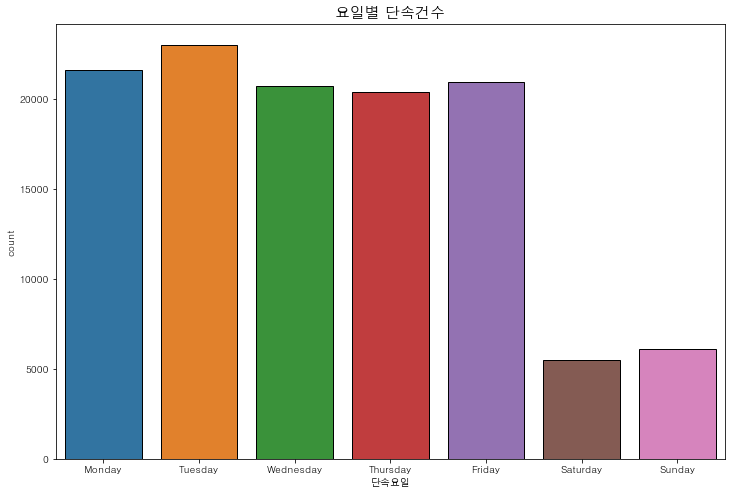

In [46]:
plt.figure(figsize = (12, 8))
sns.countplot(crime.단속요일, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], edgecolor = (0,0,0))
plt.title("요일별 단속건수", size = 15)
plt.show()

#### 2-1-2. 시간대 및 요일별 단속건수 추이 차트

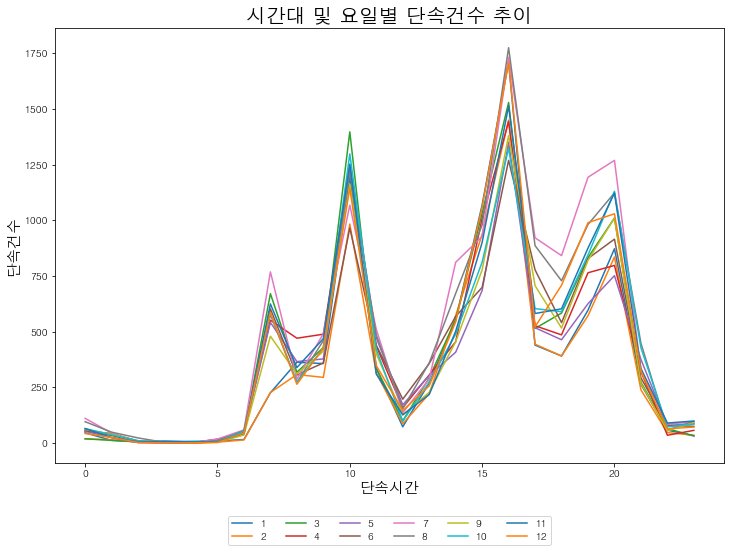

In [47]:
plt.rcParams["figure.figsize"] = (12, 8)
tab_count = pd.crosstab(crime.단속시간, crime.단속월)
tab_count.index.name = None
tab_count.plot()
plt.xlabel('단속시간', size = 15)
plt.ylabel('단속건수', size = 15)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol = 6)
plt.title("시간대 및 요일별 단속건수 추이", size = 20)
plt.show()

#### 2-1-3. 요일별 및 시간대별 단속건수 차트

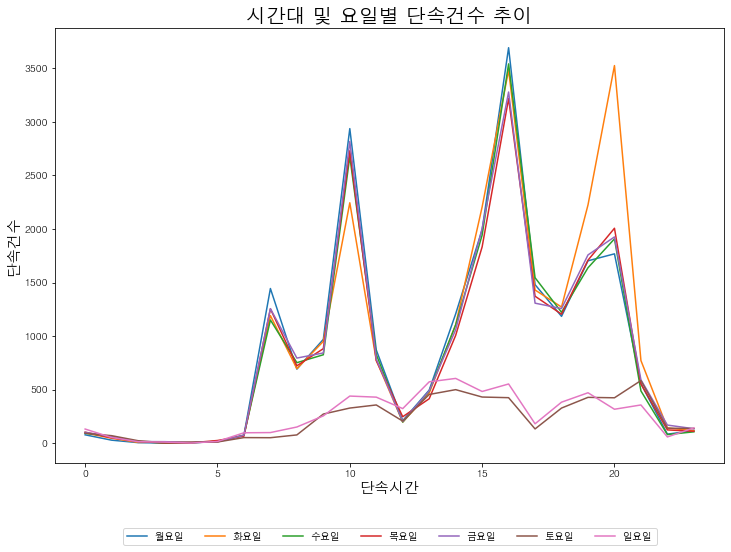

In [48]:
plt.rcParams["figure.figsize"] = (12, 8)
tab_count = pd.crosstab(crime.단속시간, crime.단속요일)
tab_count.index.name = None
tab_count[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot()
plt.xlabel('단속시간', size = 15)
plt.ylabel('단속건수', size = 15)
plt.legend(['월요일','화요일','수요일','목요일','금요일','토요일','일요일'], loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol = 7)
plt.title("시간대 및 요일별 단속건수 추이", size = 20)
plt.show()

In [49]:
crime.loc[crime.단속요일 == 'Tuesday']

,연번,시군구명,단속일시,단속동,단속장소,단속구분,주소,단속시간,단속요일,단속월,시간대
0,1,양천구,2019-01-01 00:16:00,목동,한신청구아파트,PDA,서울 양천구 목5동 한신청구아파트,0,Tuesday,1,저녁
1,2,양천구,2019-01-01 00:21:00,목동,한신청구아파트,PDA,서울 양천구 목5동 한신청구아파트,0,Tuesday,1,저녁
2,3,양천구,2019-01-01 09:36:00,목동,770-1,PDA,서울 양천구 목4동 770-1,9,Tuesday,1,오전
3,4,양천구,2019-01-01 10:22:00,신월동,331-17,PDA,서울 양천구 신월7동 331-17,10,Tuesday,1,오전
4,5,양천구,2019-01-01 10:43:00,목동,한신목동아파트,PDA,서울 양천구 목5동 한신목동아파트,10,Tuesday,1,오전
...,...,...,...,...,...,...,...,...,...,...,...
118367,118368,양천구,2019-12-31 23:07:00,목동,목동아파트,PDA,서울 양천구 목5동 목동아파트,23,Tuesday,12,저녁
118368,118369,양천구,2019-12-31 23:41:00,목동,염창역3번출구,PDA,서울 양천구 목2동 염창역3번출구,23,Tuesday,12,저녁
118369,118370,양천구,2019-12-31 23:42:00,목동,염창역3번출구,PDA,서울 양천구 목2동 염창역3번출구,23,Tuesday,12,저녁
118370,118371,양천구,2019-12-31 23:42:00,목동,염창역3번출구,PDA,서울 양천구 목2동 염창역3번출구,23,Tuesday,12,저녁


* 법정동별 단속건수

In [2881]:
crime.단속동.unique() # 단속동 unique값 확인

array(['목동', '신월동', '신정동'], dtype=object)

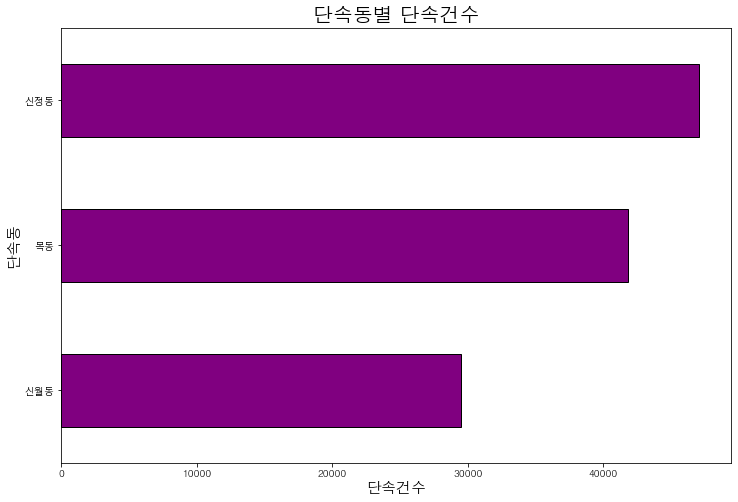

In [2882]:
crime.단속동.value_counts()[::-1].plot(kind = 'barh', edgecolor = (0,0,0), color = 'purple')
plt.xlabel('단속건수', size = 15)
plt.ylabel('단속동', size = 15)
plt.title("단속동별 단속건수", size = 20)
plt.show()

In [19]:
crime.단속동.value_counts()[::-1]

신월동    29528
목동     41800
신정동    47044
Name: 단속동, dtype: int64

#### 2-1-4. 양천구 TOP 10 적발지역

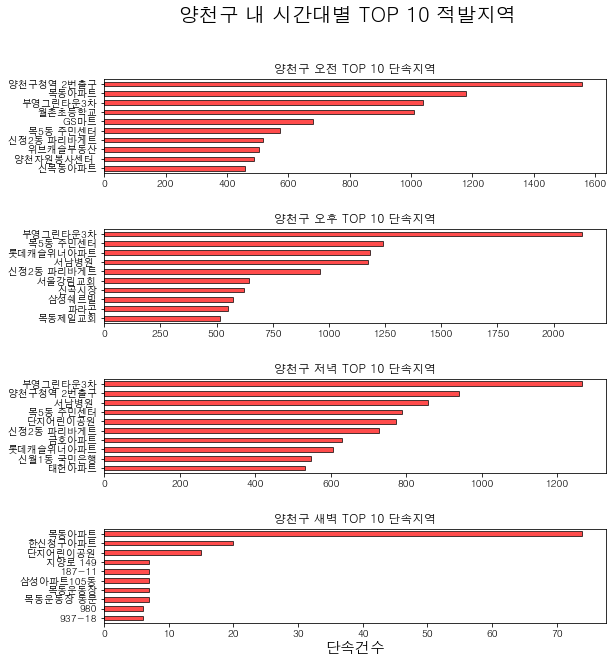

In [2885]:
f, ax = plt.subplots(4,1, figsize = (9, 10))
plt.subplots_adjust(hspace = .6)
crime.loc[crime.시간대 == '오전'].단속장소.value_counts()[:10][::-1].plot(kind = 'barh', ax = ax[0], color = 'r', alpha = .7, edgecolor = (0,0,0))
crime.loc[crime.시간대 == '오후'].단속장소.value_counts()[:10][::-1].plot(kind = 'barh', ax = ax[1], color = 'r', alpha = .7, edgecolor = (0,0,0))
crime.loc[crime.시간대 == '저녁'].단속장소.value_counts()[:10][::-1].plot(kind = 'barh', ax = ax[2], color = 'r', alpha = .7, edgecolor = (0,0,0))
crime.loc[crime.시간대 == '새벽'].단속장소.value_counts()[:10][::-1].plot(kind = 'barh', ax = ax[3], color = 'r', alpha = .7, edgecolor = (0,0,0))
ax[0].set_title("양천구 오전 TOP 10 단속지역")
ax[1].set_title("양천구 오후 TOP 10 단속지역")
ax[2].set_title("양천구 저녁 TOP 10 단속지역")
ax[3].set_title("양천구 새벽 TOP 10 단속지역")
f.suptitle("양천구 내 시간대별 TOP 10 적발지역", size = 20)
plt.xlabel('단속건수', size = 15)
plt.show()

#### 2-1-5. 목동 TOP 10 적발지역

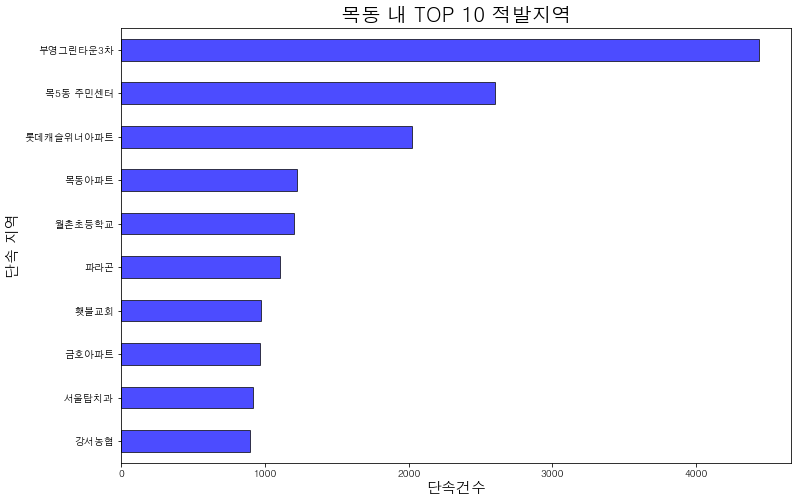

In [2886]:
crime.loc[crime.단속동.str.contains('목')].단속장소.value_counts()[:10][::-1].plot(kind = 'barh', color = 'b', alpha = .7, edgecolor = (0,0,0))
plt.title("목동 내 TOP 10 적발지역", size = 20)
plt.ylabel('단속 지역', size = 15)
plt.xlabel('단속건수', size = 15)
plt.show()

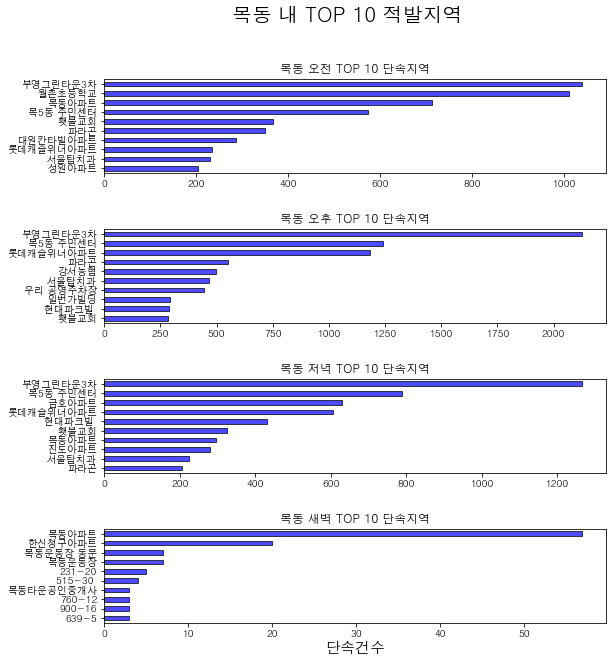

In [2887]:
f, ax = plt.subplots(4,1, figsize = (9,10))
plt.subplots_adjust(hspace = .6)
crime.loc[(crime.단속동.str.contains('목')) & (crime.시간대 == '오전')].단속장소.value_counts()[:10][::-1].plot(kind = 'barh', ax = ax[0], color = 'b', alpha = .7, edgecolor = (0,0,0))
crime.loc[(crime.단속동.str.contains('목')) & (crime.시간대 == '오후')].단속장소.value_counts()[:10][::-1].plot(kind = 'barh', ax = ax[1], color = 'b', alpha = .7, edgecolor = (0,0,0))
crime.loc[(crime.단속동.str.contains('목')) & (crime.시간대 == '저녁')].단속장소.value_counts()[:10][::-1].plot(kind = 'barh', ax = ax[2], color = 'b', alpha = .7, edgecolor = (0,0,0))
crime.loc[(crime.단속동.str.contains('목')) & (crime.시간대 == '새벽')].단속장소.value_counts()[:10][::-1].plot(kind = 'barh', ax = ax[3], color = 'b', alpha = .7, edgecolor = (0,0,0))
ax[0].set_title("목동 오전 TOP 10 단속지역")
ax[1].set_title("목동 오후 TOP 10 단속지역")
ax[2].set_title("목동 저녁 TOP 10 단속지역")
ax[3].set_title("목동 새벽 TOP 10 단속지역")
f.suptitle("목동 내 TOP 10 적발지역", size = 20)
plt.xlabel('단속건수', size = 15)
plt.show()

#### 2-1-6. 신월동 TOP 10 적발지역

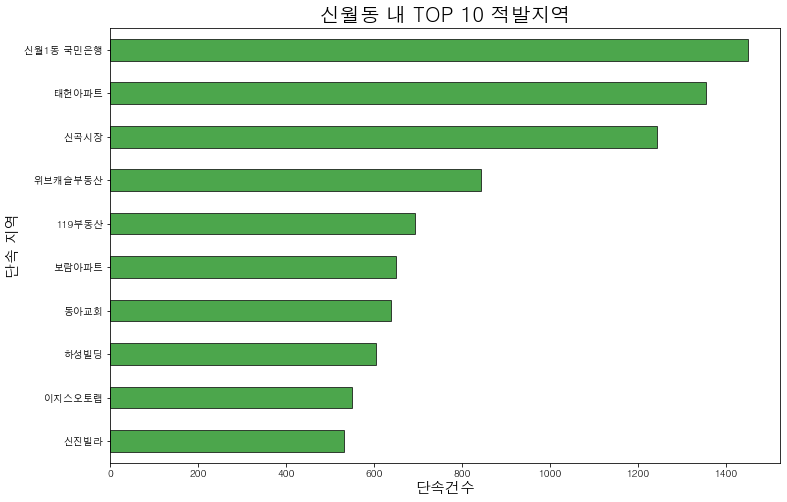

In [2888]:
crime.loc[crime.단속동.str.contains('신월')].단속장소.value_counts()[:10][::-1].plot(kind = 'barh', color = 'g', alpha = .7, edgecolor = (0,0,0))
plt.title("신월동 내 TOP 10 적발지역", size = 20)
plt.ylabel('단속 지역', size = 15)
plt.xlabel('단속건수', size = 15)
plt.show()

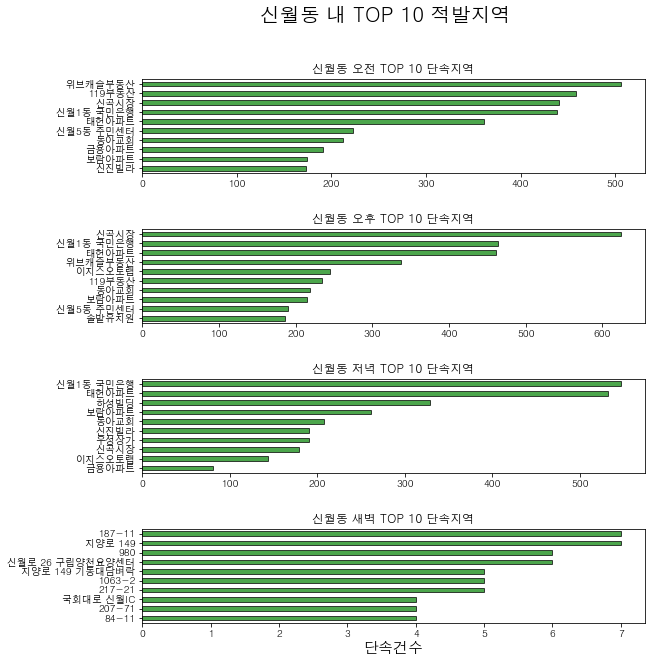

In [2889]:
f, ax = plt.subplots(4,1, figsize = (9, 10))
plt.subplots_adjust(hspace = .6)
crime.loc[(crime.단속동.str.contains('신월')) & (crime.시간대 == '오전')].단속장소.value_counts()[:10][::-1].plot(kind = 'barh', ax = ax[0], color = 'g', alpha = .7, edgecolor = (0,0,0))
crime.loc[(crime.단속동.str.contains('신월')) & (crime.시간대 == '오후')].단속장소.value_counts()[:10][::-1].plot(kind = 'barh', ax = ax[1], color = 'g', alpha = .7, edgecolor = (0,0,0))
crime.loc[(crime.단속동.str.contains('신월')) & (crime.시간대 == '저녁')].단속장소.value_counts()[:10][::-1].plot(kind = 'barh', ax = ax[2], color = 'g', alpha = .7, edgecolor = (0,0,0))
crime.loc[(crime.단속동.str.contains('신월')) & (crime.시간대 == '새벽')].단속장소.value_counts()[:10][::-1].plot(kind = 'barh', ax = ax[3], color = 'g', alpha = .7, edgecolor = (0,0,0))
ax[0].set_title("신월동 오전 TOP 10 단속지역")
ax[1].set_title("신월동 오후 TOP 10 단속지역")
ax[2].set_title("신월동 저녁 TOP 10 단속지역")
ax[3].set_title("신월동 새벽 TOP 10 단속지역")
f.suptitle("신월동 내 TOP 10 적발지역", size = 20)
plt.xlabel('단속건수', size = 15)
plt.show()

#### 2-1-7. 신정동 TOP 10 적발지역

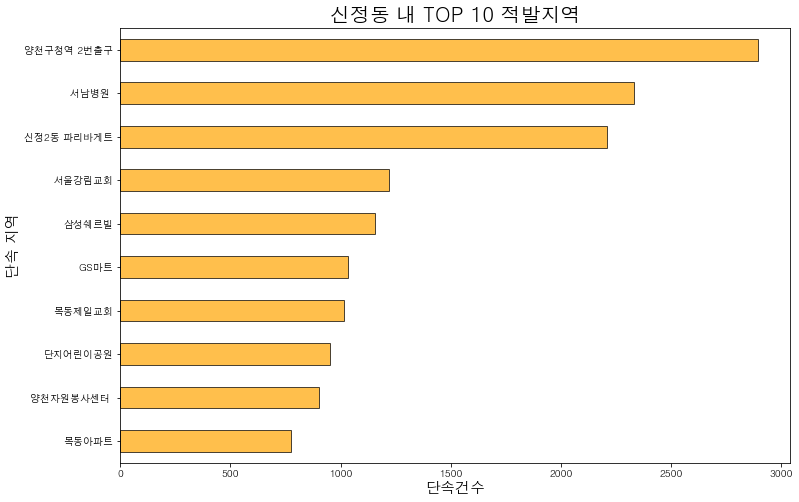

In [2890]:
crime.loc[crime.단속동.str.contains('신정')].단속장소.value_counts()[:10][::-1].plot(kind = 'barh', color = 'orange', alpha = .7, edgecolor = (0,0,0))
plt.title("신정동 내 TOP 10 적발지역", size = 20)
plt.ylabel('단속 지역', size = 15)
plt.xlabel('단속건수', size = 15)
plt.show()

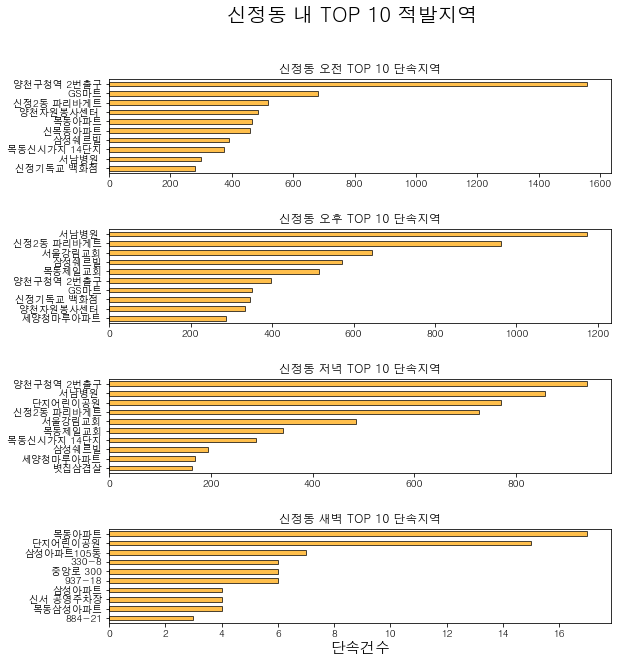

In [2891]:
f, ax = plt.subplots(4,1, figsize = (9, 10))
plt.subplots_adjust(hspace = .6)
crime.loc[(crime.단속동.str.contains('신정')) & (crime.시간대 == '오전')].단속장소.value_counts()[:10][::-1].plot(kind = 'barh', ax = ax[0], color = 'orange', alpha = .7, edgecolor = (0,0,0))
crime.loc[(crime.단속동.str.contains('신정')) & (crime.시간대 == '오후')].단속장소.value_counts()[:10][::-1].plot(kind = 'barh', ax = ax[1], color = 'orange', alpha = .7, edgecolor = (0,0,0))
crime.loc[(crime.단속동.str.contains('신정')) & (crime.시간대 == '저녁')].단속장소.value_counts()[:10][::-1].plot(kind = 'barh', ax = ax[2], color = 'orange', alpha = .7, edgecolor = (0,0,0))
crime.loc[(crime.단속동.str.contains('신정')) & (crime.시간대 == '새벽')].단속장소.value_counts()[:10][::-1].plot(kind = 'barh', ax = ax[3], color = 'orange', alpha = .7, edgecolor = (0,0,0))
ax[0].set_title("신정동 오전 TOP 10 단속지역")
ax[1].set_title("신정동 오후 TOP 10 단속지역")
ax[2].set_title("신정동 저녁 TOP 10 단속지역")
ax[3].set_title("신정동 새벽 TOP 10 단속지역")
f.suptitle("신정동 내 TOP 10 적발지역", size = 20)
plt.xlabel('단속건수', size = 15)
plt.show()

### 2-2. 양천구 건물 현황 데이터

In [276]:
bds = pd.read_csv("양천구_표준_GIS(건물).csv", encoding = 'cp949')

In [277]:
bds = bds.iloc[:,[4, 7, 9]].fillna('누락')

In [278]:
bds.sample(2)

,법정동명,특수지구분명,건축물용도명
9513,서울특별시 양천구 목동,일반,공동주택
10460,서울특별시 양천구 목동,일반,단독주택


In [280]:
bds['법정동'] = [re.findall('[가-힣]+', t[-3:])[0] for t in bds.법정동명] # 법정동명에서 '~~동'만 추출

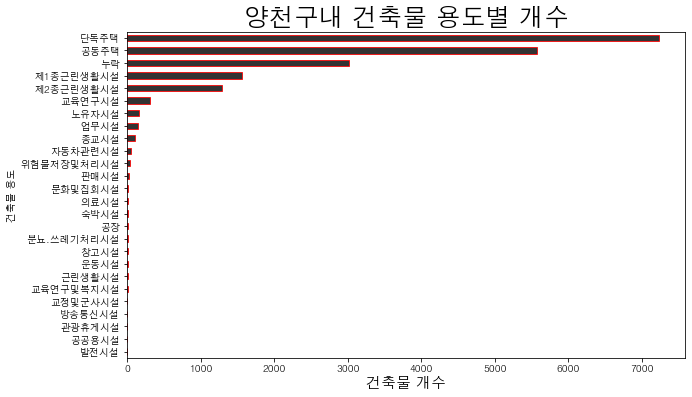

In [281]:
plt.figure(figsize = (10,6))
plt.title("양천구내 건축물 용도별 개수", size = 25)
bds.건축물용도명.value_counts()[::-1].plot(kind = 'barh', color = 'black', alpha = .8, edgecolor = (1,0,0))
plt.xlabel("건축물 개수", size = 15)
plt.ylabel("건축물 용도")
plt.show()

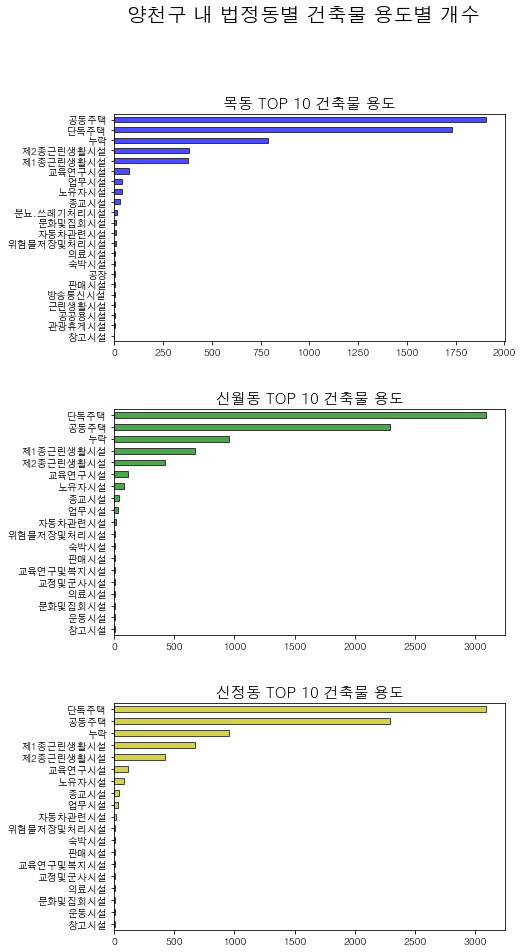

In [285]:
f, ax = plt.subplots(3,1, figsize = (7,15))
plt.subplots_adjust(hspace = .3)
bds.loc[bds.법정동 == '목동'].건축물용도명.value_counts()[::-1].plot(kind = 'barh', color = 'b', alpha = .7, edgecolor = (0,0,0), ax = ax[0])
bds.loc[bds.법정동 == '신월동'].건축물용도명.value_counts()[::-1].plot(kind = 'barh', color = 'g', alpha = .7, edgecolor = (0,0,0), ax = ax[1])
bds.loc[bds.법정동 == '신월동'].건축물용도명.value_counts()[::-1].plot(kind = 'barh', color = 'y', alpha = .7, edgecolor = (0,0,0), ax = ax[2])
ax[0].set_title("목동 TOP 10 건축물 용도", size = 15)
ax[1].set_title("신월동 TOP 10 건축물 용도", size = 15)
ax[2].set_title("신정동 TOP 10 건축물 용도", size = 15)
f.suptitle("양천구 내 법정동별 건축물 용도별 개수", size = 20)
plt.show()

### 2-3. 양천구 약업소 현황

In [286]:
df_med = pd.read_csv("서울특별시 양천구 약국 인허가 정보.csv", encoding = 'cp949')

In [287]:
df_med.sample(3)

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),약국영업면적,지정일자
27,3140000,PHMD119843140033084000002,19840713,NaN,1,영업/정상,13,영업중,NaN,NaN,...,8031.0,내외약국,20121112205727,I,2018-08-31 23:59:59.0,NaN,185943.889483,446243.158506,약국,19840713.0
173,3140000,PHMD120073140033084000009,20070601,NaN,3,폐업,3,폐업,20160502.0,NaN,...,7912.0,동인프라자약국,20160502100430,I,2018-08-31 23:59:59.0,NaN,184728.728549,448073.358079,약국,20070601.0
68,3140000,PHMD119993140033084000004,19990818,NaN,1,영업/정상,13,영업중,NaN,NaN,...,8078.0,온누리은혜약국,20150729140121,I,2018-08-31 23:59:59.0,NaN,187047.810110,445755.514912,약국,19990818.0


In [288]:
df_med.상세영업상태명.value_counts()

폐업      234
영업중     193
직권폐업      1
휴업        1
Name: 상세영업상태명, dtype: int64

In [289]:
df_med = df_med.loc[df_med.상세영업상태명 == '영업중'] # '영업중'인 약국 데이터만 사용
df_med.index = range(len(df_med))

In [290]:
jibun_null = df_med[df_med.지번주소.isnull()].사업장명 # 지번이 누락된 약국의 지번을 찾기 위해 별도 사업장명 저장

In [291]:
yc_name_null = ['양천구 ' + x for x in jibun_null] # 검색의 편의를 위해 사업장명 앞에 '양천구' 삽입

In [295]:
driver = Chrome()

In [299]:
fill_jibun = [] # 지번을 채워서 사용할 리스트 생성

In [300]:
# 지번 누락된 데이터 크롤링을 통해 지번 채워넣기
for c in range(len(yc_name_null)):

    driver.get("https://map.kakao.com/")
    time.sleep(.5)
    driver.find_element_by_xpath("/html/body/div[2]/div/div/form/fieldset/div[1]/input").click()
    element = driver.find_element_by_xpath("/html/body/div[2]/div/div/form/fieldset/div[1]/input")
    element.send_keys(yc_name_null[c])
    driver.find_element_by_css_selector("#search\.keyword\.submit").click()
    time.sleep(.5)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    try : 
        if yc_name_null[c].split(' ')[1] == soup.select('.link_name')[0]['title'] :
            fill_jibun.append('서울특별시 양천구 '+ soup.select('.lot_number')[0]['title'])
    except :
        fill_jibun.append("정보없음")
    time.sleep(.5)

In [303]:
for i in range(len(yc_name_null)):
    df_med.at[jibun_null.index[i], '지번주소'] = fill_jibun[i] # 지번주소 빈 데이터 지번주소 매핑

In [308]:
df_med['행정동'] = [x.split(' ')[2] if len(x) > 4 else '정보없음' for x in df_med.지번주소] # 동단위 텍스트만 추출

In [310]:
df_med = df_med.loc[df_med.지번주소 != '정보없음'] # 지번주소가 존재하는 데이터만 저장
df_med.index = range(df_med.shape[0])

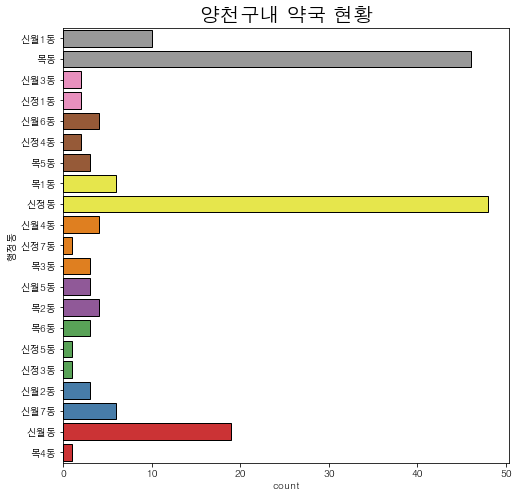

In [311]:
plt.figure(figsize = (8,8))
plt.title('양천구내 약국 현황', size = 20)
sns.countplot(y= df_med.행정동, edgecolor = (0,0,0), palette = 'Set1_r')
plt.show()

### 2-4. 대규모점포 정보

In [312]:
df_mart = pd.read_csv("서울특별시 양천구 대규모점포 인허가 정보.csv", encoding = 'cp949')

In [313]:
df_mart.영업상태명.value_counts() # 영업상태별 데이터 개수 확인

영업/정상    26
폐업        6
휴업        1
Name: 영업상태명, dtype: int64

In [314]:
df_mart = df_mart.loc[df_mart.영업상태명 == '영업/정상'] # 정상영업중인 데이터만 추출
df_mart.index = range(df_mart.shape[0])

In [315]:
df_mart.head(2)

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),점포구분명
0,3140000,1981314011407500001,19810923,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 양천구 목동중앙본로7길 45 (목동),NaN,목동시장아울렛,20140818163835,I,2018-08-31 23:59:59.0,그 밖의 대규모점포,188117.351836,448552.989898,대규모점포
1,3140000,1988314011407500001,19880919,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 양천구 지양로 78 (신월동),NaN,우성상가시장,20110816160143,I,2018-08-31 23:59:59.0,시장,185221.957910,446727.354964,대규모점포


In [317]:
df_mart.행정동 = df_mart.지번주소.apply(lambda x : x.split(' ')[2]) # 행정동 텍스트만 추출

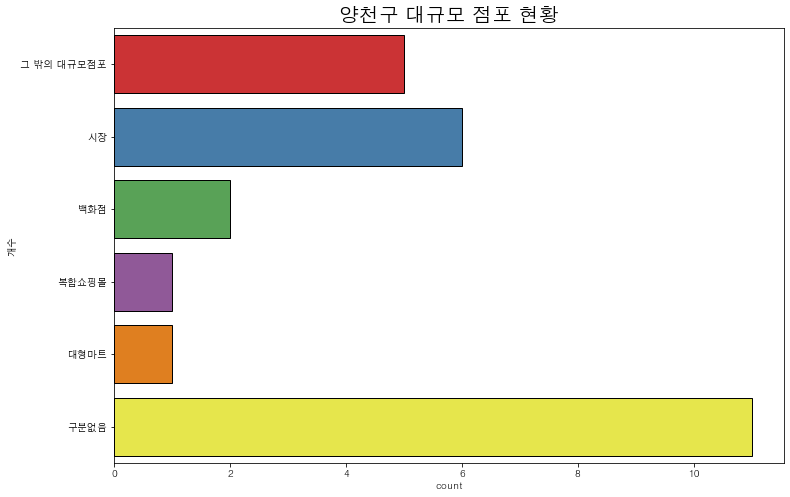

In [318]:
sns.countplot(y = df_mart.업태구분명, palette = 'Set1', edgecolor = (0,0,0))
plt.title("양천구 대규모 점포 현황", size = 20)
plt.ylabel("개수", size = 10)
plt.xticks(rotation = 0)
plt.show()

In [319]:
pd.crosstab(df_mart.행정동, df_mart.업태구분명) # 행정동 및 점포 종류별 갯수 확인

업태구분명,구분없음,그 밖의 대규모점포,대형마트,백화점,복합쇼핑몰,시장
지번주소,,,,,,
목1동,0,0,1,0,0,0
목2동,0,0,0,0,0,1
목3동,1,1,0,0,0,1
목4동,0,0,0,0,0,1
목5동,2,0,0,0,0,0
목동,0,3,0,2,1,0
신월1동,0,0,0,0,0,1
신월2동,0,0,0,0,0,1
신월5동,2,0,0,0,0,0


In [39]:
df_mart.사업장명

0                   목동시장아울렛
1                    우성상가시장
2                  현대백화점목동점
3                    행복한백화점
4              신정동세양청마루2차상가
5                홈플러스(주)목동점
6                  신한이모르젠상가
7                  목2동시장상인회
8                  목4동시장상인회
9                   경창시장상인회
10                 목3동시장상인회
11                  신영시장상인회
12               (주)이마트 목동점
13         홈플러스(주)익스프레스 신정점
14           롯데쇼핑(주)롯데슈퍼목동점
15           (주)지에스리테일 신정2점
16    (주)지에스리테일 GS수퍼 목동오거리점
17        홈플러스(주)익스프레스 목동2점
18                롯데슈퍼 목동2점
19        홈플러스(주)익스프레스 신정3점
20          롯데쇼핑(주)롯데슈퍼 신월점
21        롯데쇼핑(주)롯데슈퍼 신정3동점
22           (주)이마트 메트로 신월점
23          (주)이마트에브리데이 목동점
24                   목동에버하임
25                   목동에버하임
Name: 사업장명, dtype: object

### 2-5. 양천구 공동주택 현황(20190409)

In [4]:
df_home = pd.read_csv("서울특별시 양천구 공동주택현황_20190409.csv", encoding = 'cp949')

In [5]:
df_home.sample(2)

,형태,관리구분,건물명,행정동,지번 주소,도로명주소,준공일자,동수,호수,최소층수,최대층수,난방,관리사무소연락처,관리사무소 팩스
104,아파트,임의관리,에이스,목4동,서울특별시 양천구 목4동 769-19,서울특별시 양천구 목동중앙남로 21-15,1997-09-13,1,49,8.0,8.0,개별,02-2654-1949,NaN
31,아파트,의무관리,대림,목1동,서울특별시 양천구 목동 405,서울특별시 양천구 목동동로12길 23,1994-06-07,2,262,19.0,20.0,지역,02-2649-0682,02-2652-7978


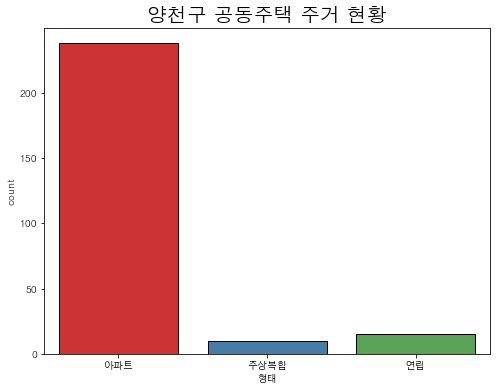

In [6]:
plt.figure(figsize = (8,6))
sns.countplot(df_home.형태, edgecolor = (0,0,0), palette = 'Set1')
plt.title("양천구 공동주택 주거 현황", size = 20)
plt.show()

In [7]:
df_home_행정동 = pd.crosstab(df_home.행정동, df_home.형태, values = df_home.호수, aggfunc = 'sum').fillna(0)

In [8]:
df_home_행정동

형태,아파트,연립,주상복합
행정동,,,
목1동,5426.0,0.0,2836.0
목2동,2318.0,0.0,0.0
목3동,1940.0,0.0,0.0
목4동,2440.0,0.0,0.0
목5동,11214.0,0.0,1005.0
신월1동,1086.0,138.0,0.0
신월2동,3270.0,183.0,0.0
신월3동,533.0,24.0,0.0
신월4동,2857.0,0.0,0.0


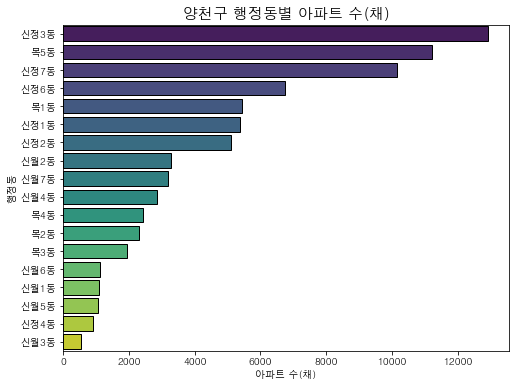

In [13]:
plt.figure(figsize = (8, 6))
sns.barplot(x = df_home_행정동.sort_values(by = '아파트', ascending = False).아파트, y = df_home_행정동.sort_values(by = '아파트', ascending = False).index, edgecolor = (0,0,0), palette = 'viridis')
plt.title("양천구 행정동별 아파트 수(채)", size = 15)
plt.xlabel('아파트 수(채)', size = 10)
plt.show()

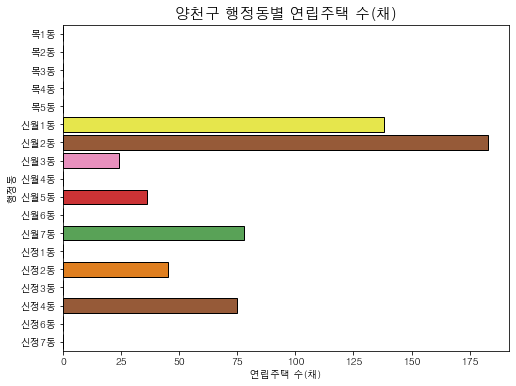

In [329]:
plt.figure(figsize = (8, 6))
sns.barplot(x = df_home_행정동.연립, y = df_home_행정동.index, edgecolor = (0,0,0), palette = 'Set1')
plt.title("양천구 행정동별 연립주택 수(채)", size = 15)
plt.xlabel('연립주택 수(채)', size = 10)
plt.show()

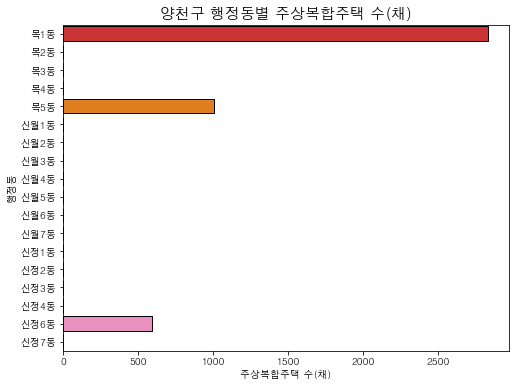

In [330]:
plt.figure(figsize = (8, 6))
sns.barplot(x = df_home_행정동.주상복합, y = df_home_행정동.index, edgecolor = (0,0,0), palette = 'Set1')
plt.title("양천구 행정동별 주상복합주택 수(채)", size = 15)
plt.xlabel('주상복합주택 수(채)', size = 10)
plt.show()

### 2-6. 양천구 영화 상영관

In [331]:
df_movie = pd.read_csv('서울특별시 양천구 영화상영관 인허가 정보.csv', encoding = 'cp949')

In [333]:
df_movie.sample(2)

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,음향시설여부,편의시설여부,소방시설여부,총게임기수,기존게임업외업종명,제공게임물명,공연장형태구분명,품목명,최초등록시점,지역구분명
2,3140000,CDFF4220002000000002,20000224,NaN,3,폐업,3,폐업,20030404.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,영화관,NaN,20000224,NaN
14,3140000,CDFF4220002006000004,20090522,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,영화관,NaN,20060427,NaN


In [84]:
df_movie.상세영업상태명.value_counts()

영업중    17
폐업      4
Name: 상세영업상태명, dtype: int64

In [86]:
df_movie = df_movie.loc[df_movie.상세영업상태명 == '영업중']
df_movie.index = range(df_movie.shape[0])

In [95]:
sorted(df_movie.지번주소.unique())

['서울특별시 양천구 목동 916번지 현대백화전 지하2층 ',
 '서울특별시 양천구 목동 916번지 현대백화점 지하2층 ',
 '서울특별시 양천구 목동 917-6번지 행복한세상백화점 7층 ']

#### 양천구의 영화 상영관은 목동에 2군데가 존재한다.

### 2-7. 양천구 병원 인허가 정보

In [335]:
df_hos = pd.read_csv("서울특별시 양천구 병원 인허가 정보.csv", encoding = 'cp949')

In [336]:
df_hos.head(2)

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,진료과목내용명,지정취소일자,완화의료지정형태,완화의료담당부서명,구급차특수,구급차일반,총인원,구조사수,허가병상수,최초지정일자
0,3140000,PHMA219853140033021200001,19850517,NaN,3,폐업,3,폐업,20090508.0,NaN,...,신경외과 마취통증의학과 재활의학과 병리과 영상의학과 산부인과 소아청소년과 외과 내과,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN
1,3140000,PHMA219933140033021200001,19930730,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [338]:
df_hos.영업상태명.value_counts()

영업/정상    18
폐업       10
Name: 영업상태명, dtype: int64

In [339]:
df_hos = df_hos.loc[df_hos.영업상태명 == '영업/정상']
df_hos.index = range(df_hos.shape[0])

In [340]:
df_hos.행정동 = df_hos.지번주소.apply(lambda x : x)

In [341]:
df_hos[df_hos.행정동.isnull()].사업장명 # 카카오 맵 검색 후 직접 기입

5      포미즈여성병원
16    목동성모요양병원
Name: 사업장명, dtype: object

In [342]:
df_hos.at[5, '행정동'] = '목동'
df_hos.at[16, '행정동'] = '목동'

In [343]:
df_hos.행정동.value_counts()

서울특별시 양천구 신월동 51번지 11호                        1
서울특별시 양천구 신정동 907번지 12호                       1
서울특별시 양천구 목동 404번지 3호                         1
서울특별시 양천구 목1동 404번지 256호 지하2층~지상6층 8층~9층      1
서울특별시 양천구 목1동 404번지 156호 대경프라자 ( 3층 5층 6층)    1
서울특별시 양천구 신정3동 1320번지 7호                      1
서울특별시 양천구 신정4동 888번지 47호                      1
서울특별시 양천구 신정동 994번지 5호 3~4층                   1
서울특별시 양천구 신정동 942번지 12호                       1
서울특별시 양천구 신정동 1268번지 복합메디컬타운                  1
서울특별시 양천구 신월동 546번지 27호                       1
서울특별시 양천구 신정동 943번지 19호 B02B01 지상2~5층         1
서울특별시 양천구 신정동 318번지 5호 황금프라자 10층              1
서울특별시 양천구 신정동 899번지 1호 홍익병원본관                 1
서울특별시 양천구 목동 911번지 1호                         1
서울특별시 양천구 신월동 550번지 3호 승일뷰티타워 8~9층            1
Name: 지번주소, dtype: int64

### 2-8. 양천구 의원 현황

In [344]:
df_hos2 = pd.read_csv('서울특별시 양천구 의원 인허가 정보.csv', encoding = 'cp949')

In [345]:
df_hos2.head(3)

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,진료과목내용명,지정취소일자,완화의료지정형태,완화의료담당부서명,구급차특수,구급차일반,총인원,구조사수,허가병상수,최초지정일자
0,3140000,PHMA119003140033041100001,19000101,NaN,1,영업/정상,13,영업중,NaN,NaN,...,보건소,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN
1,3140000,PHMA119703140033041100001,19701118,NaN,3,폐업,3,폐업,20120322.0,NaN,...,한방내과,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN
2,3140000,PHMA119743140033041100001,19740420,NaN,3,폐업,3,폐업,20170406.0,NaN,...,정형외과,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN


In [347]:
df_hos2.상세영업상태명.value_counts()

영업중     617
폐업      271
직권폐업      2
휴업        1
Name: 상세영업상태명, dtype: int64

In [348]:
df_hos2 = df_hos2.loc[df_hos2.상세영업상태명 == '영업중']
df_hos2.index = range(df_hos2.shape[0])

In [349]:
df_hos2.업태구분명.value_counts()

의원      286
치과의원    181
한의원     149
보건소       1
Name: 업태구분명, dtype: int64

In [351]:
jibun_null = df_hos2[df_hos2.지번주소.isnull()].사업장명

In [352]:
yc_name_null = ['양천구 ' + x for x in jibun_null]

In [353]:
fill_null = []

In [354]:
for c in range(len(yc_name_null)):

    driver.get("https://map.kakao.com/")
    time.sleep(.75)
    driver.find_element_by_xpath("/html/body/div[2]/div/div/form/fieldset/div[1]/input").click()
    element = driver.find_element_by_xpath("/html/body/div[2]/div/div/form/fieldset/div[1]/input")
    element.send_keys(yc_name_null[c])
    driver.find_element_by_css_selector("#search\.keyword\.submit").click()
    time.sleep(.75)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    try : 
        if yc_name_null[c].split(' ')[1] == soup.select('.link_name')[0]['title'] :
            fill_null.append('서울특별시 양천구 '+ soup.select('.lot_number')[0]['title'])
        else:
            fill_null.append('정보없음')
    except :
        fill_null.append("정보없음")
    time.sleep(.5)

In [355]:
for i in range(len(yc_name_null)):
    df_hos2.at[name_null.index[i], '지번주소'] = fill_null[i]

In [356]:
df_hos2['행정동'] = [x.split(' ')[2] if len(x) > 4 else '정보없음' for x in df_hos2.지번주소]

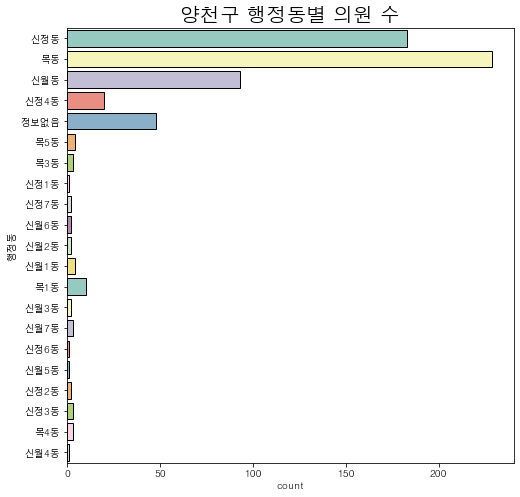

In [357]:
plt.figure(figsize = (8, 8))
sns.countplot(y = df_hos2.행정동, edgecolor = (0,0,0), palette = 'Set3')
plt.title("양천구 행정동별 의원 수", size = 20)
plt.show()

### 2-9. 양천구 인구 데이터 분석

* 주거인구와 생활인구로 파생변수 생성

#### 2-9-1. 주거인구 데이터

In [52]:
shelter = pd.read_csv("주민등록인구및세대현황(2019.07).csv", encoding = 'cp949', thousands = ',').iloc[1:, :3 ]

In [53]:
shelter.행정구역 = shelter.행정구역.str[10 : -12]
shelter.columns = ['행정동', '주거인구수','세대_수']

In [54]:
shelter.head()

,행정동,주거인구수,세대_수
1,목1동,31655,10271
2,목2동,30857,12678
3,목3동,22617,9637
4,목4동,26653,9950
5,목5동,42511,13339


#### 2-9-2. 생활인구 데이터

In [55]:
# 19년 7월 생활인구 데이터 활용
pop = pd.read_csv("3. 서울시 생활인구 현황_201907.csv", encoding = 'utf-8')

In [56]:
p_c = pop.columns[1:]
pop.drop('여자70세이상생활인구수', axis = 1, inplace = True)
pop.index.name = '기준일ID'
pop.columns = p_c
pop = pop.reset_index()

In [57]:
pop.sample(2)

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
252609,20190725,19,11620595,34983.4955,691.6378,363.4804,868.8127,1775.5054,2824.5864,1804.9791,...,2859.9164,1352.0091,1269.2672,913.1730,1115.7665,1021.8893,1160.1007,988.5700,843.8570,2269.3211
272880,20190727,19,11380625,39613.8000,1634.9676,742.2762,1083.3806,1061.4181,1189.6630,1305.4912,...,1204.2252,1349.5496,1725.8300,1490.4008,1847.7766,1518.3614,1916.9520,1551.6557,1100.2109,3197.8877


In [58]:
pop.iloc[: , [0,2]] = pop.iloc[:, [0,2]].astype('str') # 편의를 위해 행정동코드의 타입 string으로 변환

In [59]:
pop['운전가능생활인구수'] = pop[pop.columns[3:][(pop.columns[3:].str[2] != '1') & (pop.columns[3:].str[2] != '0')]].sum(axis = 1)

In [60]:
## 행정동 코드를 기준으로 행정동 이름 매핑
def yc_dong(x):
    if x == '11470510' :
        return "목1동"
    elif x == '11470520' :
        return "목2동"
    elif x == '11470530' :
        return "목3동"
    elif x == '11470540' :
        return "목4동"
    elif x == '11470550' :
        return "목5동"
    elif x == '11470560' :
        return "신월1동"
    elif x == '11470570' :
        return "신월2동"
    elif x == '11470580' :
        return "신월3동"
    elif x == '11470590' :
        return "신월4동"
    elif x == '11470600' :
        return "신월5동"
    elif x == '11470610' :
        return "신월6동"
    elif x == '11470611' :
        return "신월7동"
    elif x == '11470620' :
        return "신정1동"
    elif x == '11470630' :
        return "신정2동"
    elif x == '11470640' :
        return "신정3동"
    elif x == '11470650' :
        return "신정4동"
    elif x == '11470670' :
        return "신정6동"
    elif  x == '11470680':
        return "신정7동"
    else :
        return x

In [61]:
pop['행정동'] = pop.행정동코드.apply(yc_dong)

In [62]:
pop = pop.loc[(pop.행정동.str.startswith('목')) | (pop.행정동.str.startswith('신'))]

In [63]:
pop.기준일ID = pd.to_datetime(pop.기준일ID)

In [64]:
pop['요일명'] = pop.기준일ID.dt.day_name()

In [65]:
pop = pd.merge(pop, shelter, how = 'left', on = '행정동')

In [66]:
pop = pop[['행정동','요일명','주거인구수','운전가능생활인구수','시간대구분']]

In [67]:
pop['인구유입차'] = pop.운전가능생활인구수 - pop.주거인구수

#### 목동

In [68]:
m_pop = pop.loc[pop.행정동.str.contains('목')]

In [69]:
m_pop.head()

,행정동,요일명,주거인구수,운전가능생활인구수,시간대구분,인구유입차
0,목1동,Monday,31655,67205.8980,0,35550.8980
1,목2동,Monday,30857,54849.2676,0,23992.2676
2,목3동,Monday,22617,37598.1273,0,14981.1273
3,목4동,Monday,26653,34389.7027,0,7736.7027
4,목5동,Monday,42511,73659.5947,0,31148.5947


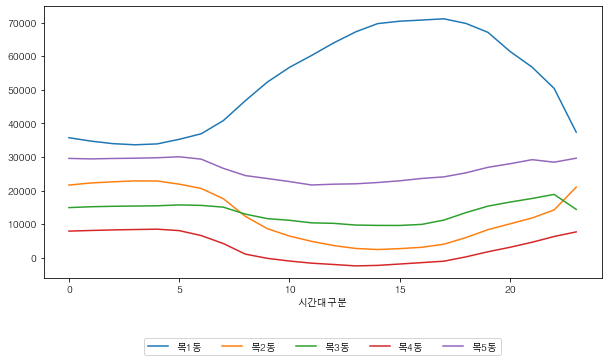

In [70]:
plt.rcParams['figure.figsize'] = (10,5)
pd.crosstab(m_pop.시간대구분, m_pop.행정동, values = m_pop.인구유입차, aggfunc = 'mean').plot()
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -.3), ncol = 5)
plt.show()

#### 신월동

In [71]:
sw_pop = pop.loc[pop.행정동.str.contains('신월')]

In [72]:
sw_pop.head()

,행정동,요일명,주거인구수,운전가능생활인구수,시간대구분,인구유입차
5,신월1동,Monday,21319,34535.1685,0,13216.1685
6,신월2동,Monday,22177,30603.2860,0,8426.2860
7,신월3동,Monday,16354,25797.6196,0,9443.6196
8,신월4동,Monday,18820,28160.4927,0,9340.4927
9,신월5동,Monday,15219,22193.7860,0,6974.7860


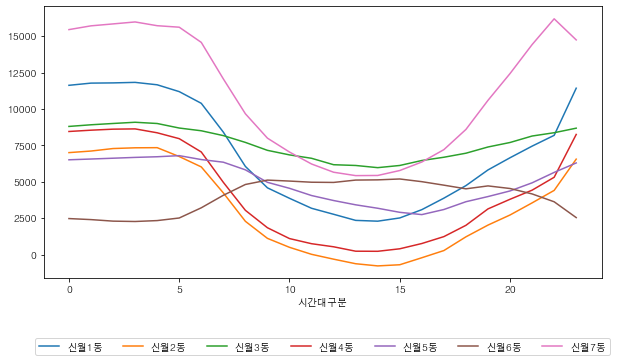

In [73]:
plt.rcParams['figure.figsize'] = (10,5)
pd.crosstab(sw_pop.시간대구분, sw_pop.행정동, values = sw_pop.인구유입차, aggfunc = 'mean').plot()
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -.3), ncol = 7)
plt.show()

#### 신정동

In [74]:
sj_pop = pop.loc[pop.행정동.str.contains('신정')]

In [75]:
sj_pop.head()

,행정동,요일명,주거인구수,운전가능생활인구수,시간대구분,인구유입차
12,신정1동,Monday,21120,26030.1719,0,4910.1719
13,신정2동,Monday,20348,28251.9896,0,7903.9896
14,신정3동,Monday,47795,76124.8232,0,28329.8232
15,신정4동,Monday,34563,63904.2074,0,29341.2074
16,신정6동,Monday,25050,39574.6538,0,14524.6538


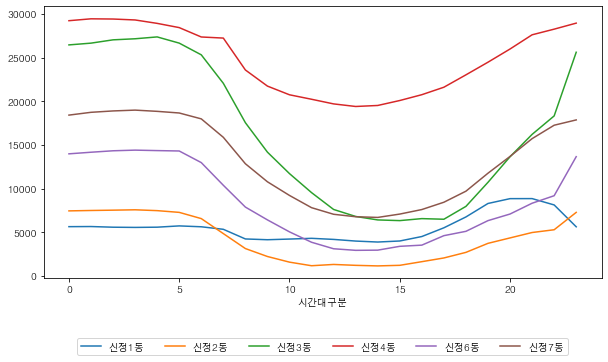

In [76]:
plt.rcParams['figure.figsize'] = (10,5)
pd.crosstab(sj_pop.시간대구분, sj_pop.행정동, values = sj_pop.인구유입차, aggfunc = 'mean').plot()
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -.3), ncol = 6)
plt.show()

In [77]:
# 주말 평일 여부 추출 함수
def day_weekday(x):
    if x in ['Saturday', 'Sunday'] :
        return '주말'
    else :
        return '평일'

In [78]:
pop['평일주말여부'] = pop.요일명.apply(day_weekday)

In [79]:
# 평일 행정동별 및 시간대별 인구유입차 테이블
dong_time_pop_day = pop.loc[pop.평일주말여부 == '평일'].groupby(['행정동', '시간대구분'])['인구유입차'].mean().reset_index()
dong_time_pop_day.index.name = None

In [80]:
# 주말 행정동별 및 시간대별 인구유입차 테이블
dong_time_pop_weekday = pop.loc[pop.평일주말여부 == '주말'].groupby(['행정동', '시간대구분'])['인구유입차'].mean().reset_index()
dong_time_pop_weekday.index.name = None

#### 평일 데이터

In [81]:
md_time_pop_day = dong_time_pop_day.loc[dong_time_pop_day.행정동.str.contains('목')] # 목동
sw_time_pop_day = dong_time_pop_day.loc[dong_time_pop_day.행정동.str.contains('신월')] # 신월동
sj_time_pop_day = dong_time_pop_day.loc[dong_time_pop_day.행정동.str.contains('신정')] # 신정동

#### 주말 데이터

In [82]:
md_time_pop_weekday = dong_time_pop_weekday.loc[dong_time_pop_weekday.행정동.str.contains('목')] # 목동
sw_time_pop_weekday = dong_time_pop_weekday.loc[dong_time_pop_weekday.행정동.str.contains('신월')] # 신월동
sj_time_pop_weekday = dong_time_pop_weekday.loc[dong_time_pop_weekday.행정동.str.contains('신정')] # 신정동

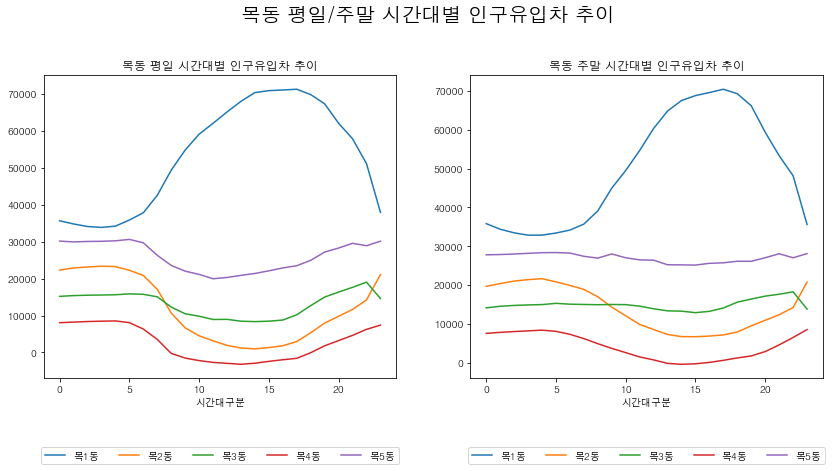

In [83]:
f, ax = plt.subplots(1,2, figsize = (12, 6))
plt.subplots_adjust(hspace = 1.2)
pd.crosstab(md_time_pop_day.시간대구분, md_time_pop_day.행정동, values = md_time_pop_day.인구유입차, aggfunc = lambda x : x).plot(ax = ax[0])
pd.crosstab(md_time_pop_weekday.시간대구분, md_time_pop_weekday.행정동, values = md_time_pop_weekday.인구유입차, aggfunc = lambda x : x).plot(ax = ax[1])
ax[0].legend(loc="lower center", bbox_to_anchor=(0.5, -.3), ncol = 5)
ax[1].legend(loc="lower center", bbox_to_anchor=(0.5, -.3), ncol = 5)
ax[0].set_title("목동 평일 시간대별 인구유입차 추이")
ax[1].set_title("목동 주말 시간대별 인구유입차 추이")
f.suptitle("목동 평일/주말 시간대별 인구유입차 추이", size = 20, y = 1.1)
plt.tight_layout()
plt.show()

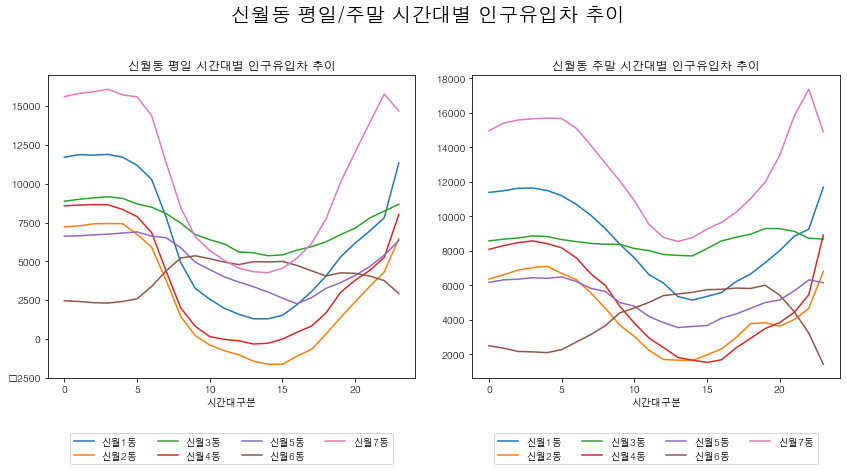

In [84]:
f, ax = plt.subplots(1,2, figsize = (12, 6))
plt.subplots_adjust(hspace = 1.2)
pd.crosstab(sw_time_pop_day.시간대구분, sw_time_pop_day.행정동, values = sw_time_pop_day.인구유입차, aggfunc = lambda x : x).plot(ax = ax[0])
pd.crosstab(sw_time_pop_weekday.시간대구분, sw_time_pop_weekday.행정동, values = sw_time_pop_weekday.인구유입차, aggfunc = lambda x : x).plot(ax = ax[1])
ax[0].legend(loc="lower center", bbox_to_anchor=(0.5, -.3), ncol = 4)
ax[1].legend(loc="lower center", bbox_to_anchor=(0.5, -.3), ncol = 4)
ax[0].set_title("신월동 평일 시간대별 인구유입차 추이")
ax[1].set_title("신월동 주말 시간대별 인구유입차 추이")
f.suptitle("신월동 평일/주말 시간대별 인구유입차 추이", size = 20, y = 1.1)
plt.tight_layout()
plt.show()

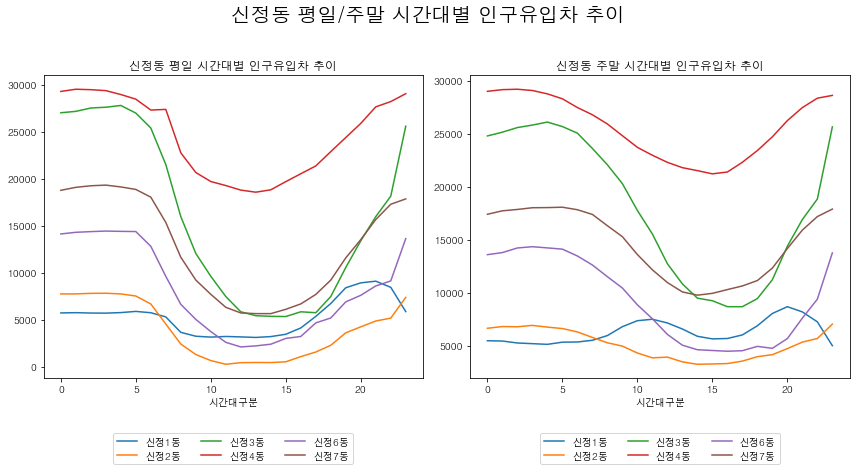

In [85]:
f, ax = plt.subplots(1,2, figsize = (12, 6))
plt.subplots_adjust(hspace = 1.2)
pd.crosstab(sj_time_pop_day.시간대구분, sj_time_pop_day.행정동, values = sj_time_pop_day.인구유입차, aggfunc = lambda x : x).plot(ax = ax[0])
pd.crosstab(sj_time_pop_weekday.시간대구분, sj_time_pop_weekday.행정동, values = sj_time_pop_weekday.인구유입차, aggfunc = lambda x : x).plot(ax = ax[1])
ax[0].legend(loc="lower center", bbox_to_anchor=(0.5, -.3), ncol = 3)
ax[1].legend(loc="lower center", bbox_to_anchor=(0.5, -.3), ncol = 3)
ax[0].set_title("신정동 평일 시간대별 인구유입차 추이")
ax[1].set_title("신정동 주말 시간대별 인구유입차 추이")
f.suptitle("신정동 평일/주말 시간대별 인구유입차 추이", size = 20, y = 1.1)
plt.tight_layout()
plt.show()

In [86]:
# 거주자용 주차장 평일 시간대별 및 동별 인구유입차 평균
living_d = pd.crosstab(dong_time_pop_day.시간대구분, dong_time_pop_day.행정동, values = dong_time_pop_day.인구유입차, aggfunc = 'mean').loc[[0,1,2,3,4,5,6,7,8,9,18,19,20,21,22,23]]
living_d.index.name = None
living_d.columns.name = None
# 거주자용 주차장 주말 시간대별 및 동별 인구유입차 평균
living_w = pd.crosstab(dong_time_pop_weekday.시간대구분, dong_time_pop_weekday.행정동, values = dong_time_pop_weekday.인구유입차, aggfunc = 'mean').loc[[0,1,2,3,4,5,6,7,8,9,18,19,20,21,22,23]]
living_w.index.name = None
living_w.columns.name = None

In [87]:
# 방문자용 주차장 주말 시간대별 및 동별 인구유입차 평균
visiting_d = pd.crosstab(dong_time_pop_day.시간대구분, dong_time_pop_day.행정동, values = dong_time_pop_day.인구유입차, aggfunc = 'mean').loc[9:18]
visiting_d.index.name = None
visiting_d.columns.name = None
# 방문자용 주차장 주말 시간대별 및 동별 인구유입차 평균
visiting_w = pd.crosstab(dong_time_pop_weekday.시간대구분, dong_time_pop_weekday.행정동, values = dong_time_pop_weekday.인구유입차, aggfunc = 'mean').loc[9:18]
visiting_w.index.name = None
visiting_w.columns.name = None

In [88]:
# 각 동별 최대 인구유입차 추출
def find_max(x):
        return max(x)

In [89]:
# 거주자
l_d_max_list = []
l_w_max_list = []
for c in living_d.columns :
    l_d_max_list.append(find_max(living_d[c]))
    l_w_max_list.append(find_max(living_w[c]))

# 방문자    
v_d_max_list = []
v_w_max_list = []
for c in visiting_d.columns :
    v_d_max_list.append(find_max(visiting_d[c]))
    v_w_max_list.append(find_max(visiting_w[c]))

In [90]:
l_max_df = pd.DataFrame({'행정동' : living_d.columns, '거주자평일유입차' : l_d_max_list, '거주자주말유입차' : l_w_max_list})
v_max_df = pd.DataFrame({'행정동' : visiting_d.columns, '방문자평일유입차' : v_d_max_list, '방문자주말유입차' : v_w_max_list})

## 3. 거주자 우선 주차장용 모델링 & 방문자  우선 주차장용 모델링

In [214]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor, plot_importance
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import scipy.stats as stats
import statsmodels.api as sm
from lightgbm import LGBMRegressor

### 3-1. 거주자 우선 주차장용 모델링

#### 3-1-1. 기본 데이터 사용 모델

In [13]:
l_data = pd.read_csv('train_거주_최종.csv', encoding = 'cp949', thousands = ',')

In [14]:
l_data.sample(3)

,주차장명,행정동,x,y,유흥주점_수,단란주점_수,일반음식점_수,대규모점포_수,단속건수_합,sum월_평균_소득,...,고등학교_수,대학교_수,슈퍼마켓_수,극장_수,숙박시설_수,지하철역_수,버스정류장_수,세대_수,거주자평일유입차,거주자주말유입차
33,탑건신월진선미아파트,신월5동,126.82815,37.53820,0,1,85,1,3406,4748141,...,3,0,1,0,8,0,46,6233,6897.658626,6493.208612
25,오목교역7번출구,목1동,126.87574,37.52463,0,3,237,1,4012,5565096,...,0,0,1,2,6,1,22,10271,69891.006610,69301.027140
10,서서울호수공원 신월3동 구역,신월3동,126.82985,37.52767,0,0,6,0,500,2347871,...,0,0,0,1,2,0,10,7956,9160.184426,9302.730000


In [15]:
l_data['학군'] = l_data[['유치원_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수']].sum(axis = 1)
l_data['상권'] = l_data[['슈퍼마켓_수', '대규모점포_수']].sum(axis = 1)
l_data['의료시설'] = l_data[['종합병원_수','일반병원_수','약국_수']].sum(axis = 1)
l_data['교통인프라'] = l_data[['지하철역_수', '버스정류장_수']].sum(axis = 1)
l_data['주점'] = l_data[['유흥주점_수', '단란주점_수']].sum(axis = 1)

In [16]:
l_data.drop(l_data.columns[l_data.columns.str[:3] == 'max'], axis = 1, inplace = True)

In [17]:
l_data.drop(['유흥주점_수','은행_수', 'sum의류_신발_지출', 'sum생활용품_지출', 'sum의료비_지출', '단란주점_수','집객시설_수', '종합병원_수','일반병원_수','약국_수', '유치원_수', '초등학교_수',
              '중학교_수', '고등학교_수', 'sum지출_총금액', '대학교_수', '슈퍼마켓_수', '대규모점포_수', '지하철역_수',
        '버스정류장_수', '종합병원_수', '일반병원_수', '약국_수', '숙박시설_수'], axis = 1, inplace = True)

In [18]:
X = l_data.iloc[:, 4:].drop(['단속건수_합'], axis = 1)
Y = l_data[['단속건수_합']]

In [19]:
X.columns = ['일반음식점수', '월_평균소득_합', '식료품_지출_합', '교통_지출_합', '여가_지출_합', '문화_지출_합', '교육_지출_합',
            '유흥_지출_합', '관공서_수_합','극장_수',  '세대_수_합', '거주자평일유입차', '거주자주말유입차', '학군_수_합',
            '상권_수_합', '의료시설_수_합' ,'교통인프라_수_합', '주점_수_합']
X = X[sorted(X.columns)]

#### StandardScaler 사용

In [20]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(X))
scaled_df.columns = X.columns

#### VIF 지수 확인

- VIF가 10이 넘는 변수 제거

In [21]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(scaled_df.values, i) for i in range(scaled_df.shape[1])]
vif["features"] = scaled_df.columns 

In [22]:
# vif가 10이 넘는 변수들이 있을 때마다 vif가 가장 큰 변수를 제거해가면서 모든 변수가 vif가 10 이하일 때까지 진행
for c in range(len(vif)) :
    if vif.sort_values(by = 'VIF Factor')[::-1]['VIF Factor'].iloc[0] >= 10 :
        df = scaled_df[vif.sort_values(by = 'VIF Factor')[::-1][1:].features]
        vif = pd.DataFrame()
        vif["features"] = df.columns 
        vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    else :
        break

In [23]:
vif

,features,VIF Factor
0,월_평균소득_합,7.652624
1,의료시설_수_합,6.629535
2,학군_수_합,6.113332
3,일반음식점수,3.875601
4,주점_수_합,3.613594
5,상권_수_합,3.124216
6,관공서_수_합,2.595699
7,극장_수,2.725685
8,거주자주말유입차,2.704536
9,세대_수_합,1.944115


In [24]:
scaled_df = scaled_df[vif.features]

In [25]:
kfold = KFold(n_splits = 4, random_state = 2020, shuffle = True) # 4-kfold 실행

#### OLS 모델 사용

In [26]:
lm = sm.OLS(Y, scaled_df)

In [27]:
results = lm.fit()

In [28]:
results.summary() # OLS 모델 결과 summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 단속건수_합   R-squared (uncentered):                   0.249
Model:                            OLS   Adj. R-squared (uncentered):             -0.068
Method:                 Least Squares   F-statistic:                             0.7849
Date:                Wed, 19 Aug 2020   Prob (F-statistic):                       0.652
Time:                        20:35:19   Log-Likelihood:                         -346.66
No. Observations:                  37   AIC:                                      715.3
Df Residuals:                      26   BIC:                                      733.0
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
월_평균소득_합    -642.8733   1538.756     -0.418      0.680   -3805.831    2520.084
의료시설_수_합     638.1584   1432.208      0.446      0.660   -2305.787    3582.104
학군_수_합      -365.0042   1375.319     -0.265      0.793   -3192.013    2462.005
일반음식점수      1346.1702   1095.050      1.229      0.230    -904.737    3597.078
주점_수_합       352.4617   1057.387      0.333      0.742   -1821.029    2525.953
상권_수_합      -140.8085    983.184     -0.143      0.887   -2161.773    1880.156
관공서_수_합      329.8409    896.172      0.368      0.716   -1512.268    2171.950
극장_수         -86.3184    918.337     -0.094      0.926   -1973.988    1801.351
거주자주말유입차    -189.6266    914.768     -0.207      0.837   -2069.959    1690.705
세대_수_합      -311.2605    775.578     -0.401      0.691   -1905.484    1282.963
교통_지출_합      296.4915    670.637      0.442      0.662   -1082.024    1675.007
==============================================================================
Omnibus:                        5.489   Durbin-Watson:                   0.177
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                4.187
Skew:                           0.592   Prob(JB):                        0.123
Kurtosis:                       4.146   Cond. No.                         7.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### LinearRegression(OLS) 모델 사용

In [29]:
lr_reg = LinearRegression()

In [30]:
lr_reg.fit(scaled_df, Y)

LinearRegression()

In [31]:
cv_reg = cross_val_score(lr_reg, scaled_df, Y, cv = kfold, n_jobs = -1, scoring= 'neg_mean_absolute_error')

#### 의사결정나무 모델 사용

In [32]:
dt = DecisionTreeRegressor(random_state = 2020)

In [33]:
dt.fit(scaled_df, Y) # 전체 데이터 학습

DecisionTreeRegressor(random_state=2020)

#### 의사결정나무 GridSearchCV

In [34]:
dt_params = {'max_depth' : [3,4,5,6,7,8,9], 'min_samples_split': range(1, 20)}

In [35]:
grid_dt = GridSearchCV(dt, param_grid = dt_params, cv = kfold, n_jobs = -1, scoring = 'neg_mean_absolute_error')

In [36]:
best_dt = grid_dt.fit(scaled_df, Y)

#### 의사결정나무 변수 중요도 탐색

Feature Name: 월_평균소득_합, Feature Score: 0.00108
Feature Name: 의료시설_수_합, Feature Score: 0.19009
Feature Name: 학군_수_합, Feature Score: 0.00065
Feature Name: 일반음식점수, Feature Score: 0.64847
Feature Name: 주점_수_합, Feature Score: 0.00000
Feature Name: 상권_수_합, Feature Score: 0.01246
Feature Name: 관공서_수_합, Feature Score: 0.09098
Feature Name: 극장_수, Feature Score: 0.00000
Feature Name: 거주자주말유입차, Feature Score: 0.00000
Feature Name: 세대_수_합, Feature Score: 0.05597
Feature Name: 교통_지출_합, Feature Score: 0.00029


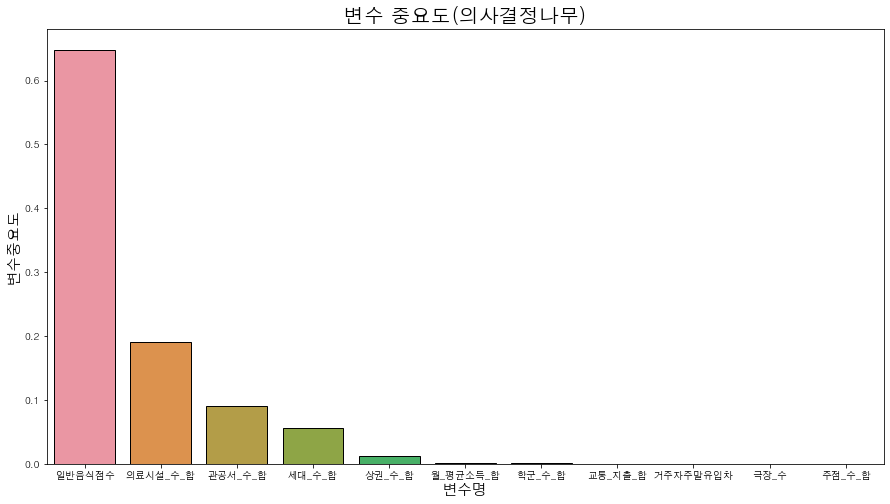

In [37]:
plt.figure(figsize = (15,8))
dt_importance = grid_dt.best_estimator_.feature_importances_
fname_list = []
for i,v in enumerate(dt_importance):
    fname_list.append(scaled_df.columns[i])
    print('Feature Name: %0s, Feature Score: %.5f' % (scaled_df.columns[i],v))
dt_imp_df = pd.DataFrame({'변수명' : fname_list, '중요도' : dt_importance}).sort_values(by = '중요도')[::-1]
sns.barplot(dt_imp_df.변수명, dt_imp_df.중요도, edgecolor = (0,0,0))
plt.title('변수 중요도(의사결정나무)', size = 20)
plt.ylabel('변수중요도', size = 15)
plt.xlabel('변수명', size = 15)
plt.show()

#### 랜덤포레스트 모델 사용

In [38]:
rf = RandomForestRegressor(random_state = 2020)

In [39]:
rf.fit(scaled_df, Y)

RandomForestRegressor(random_state=2020)

#### 랜덤포레스트 GridSearchCV

In [40]:
rf_params = {'max_depth' : [3,4,5,6,7], 'n_estimators' : [15,25,30,45, 50,75,100, 150]}

In [41]:
grid_rf = GridSearchCV(rf, param_grid = rf_params, cv = kfold, n_jobs = -1, scoring = 'neg_mean_absolute_error')

In [42]:
best_rf = grid_rf.fit(scaled_df, Y)

#### 랜덤포레스트 변수 중요도 탐색

Feature Name: 월_평균소득_합, Feature Score: 0.03265
Feature Name: 의료시설_수_합, Feature Score: 0.05332
Feature Name: 학군_수_합, Feature Score: 0.02338
Feature Name: 일반음식점수, Feature Score: 0.63618
Feature Name: 주점_수_합, Feature Score: 0.09390
Feature Name: 상권_수_합, Feature Score: 0.01884
Feature Name: 관공서_수_합, Feature Score: 0.03933
Feature Name: 극장_수, Feature Score: 0.00332
Feature Name: 거주자주말유입차, Feature Score: 0.00355
Feature Name: 세대_수_합, Feature Score: 0.02051
Feature Name: 교통_지출_합, Feature Score: 0.07501


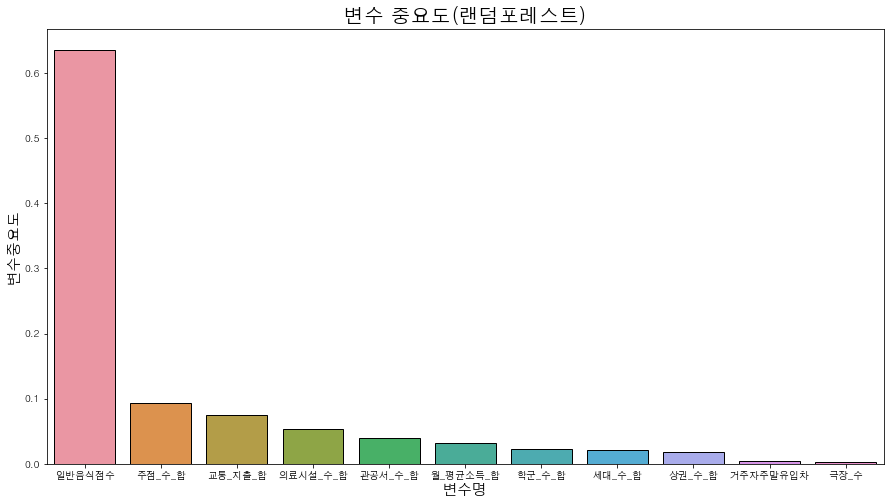

In [43]:
plt.figure(figsize = (15,8))
rf_importance = grid_rf.best_estimator_.feature_importances_
fname_list = []
for i,v in enumerate(rf_importance):
    fname_list.append(scaled_df.columns[i])
    print('Feature Name: %0s, Feature Score: %.5f' % (scaled_df.columns[i],v))
rf_imp_df = pd.DataFrame({'변수명' : fname_list, '중요도' : rf_importance}).sort_values(by = '중요도')[::-1]
sns.barplot(rf_imp_df.변수명, rf_imp_df.중요도, edgecolor = (0,0,0))
plt.title('변수 중요도(랜덤포레스트)', size = 20)
plt.ylabel('변수중요도', size = 15)
plt.xlabel('변수명', size = 15)
plt.show()

#### XGBoost 모델 사용

In [44]:
xgb = XGBRegressor(random_state = 2020)

In [45]:
xgb.fit(scaled_df, Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### XGBoost GridSearchCV

In [46]:
xgb_params = {'max_depth' : [3,4,5,6,7], 'n_estimators' : [15,30,50,75,100],
             'learning_rate' : [0.005, 0.015, 0.05, 0.1, 0.2]}

In [47]:
grid_xgb = GridSearchCV(xgb, param_grid = xgb_params, cv = kfold, n_jobs = -1, scoring = 'neg_mean_absolute_error')

In [48]:
best_xgb = grid_xgb.fit(scaled_df, Y)

In [49]:
best_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}

#### XGBoost 변수 중요도 탐색

Feature Name: 월_평균소득_합, Feature Score: 0.03368
Feature Name: 의료시설_수_합, Feature Score: 0.04652
Feature Name: 학군_수_합, Feature Score: 0.03873
Feature Name: 일반음식점수, Feature Score: 0.41458
Feature Name: 주점_수_합, Feature Score: 0.07113
Feature Name: 상권_수_합, Feature Score: 0.01474
Feature Name: 관공서_수_합, Feature Score: 0.03585
Feature Name: 극장_수, Feature Score: 0.00019
Feature Name: 거주자주말유입차, Feature Score: 0.02284
Feature Name: 세대_수_합, Feature Score: 0.06800
Feature Name: 교통_지출_합, Feature Score: 0.25374


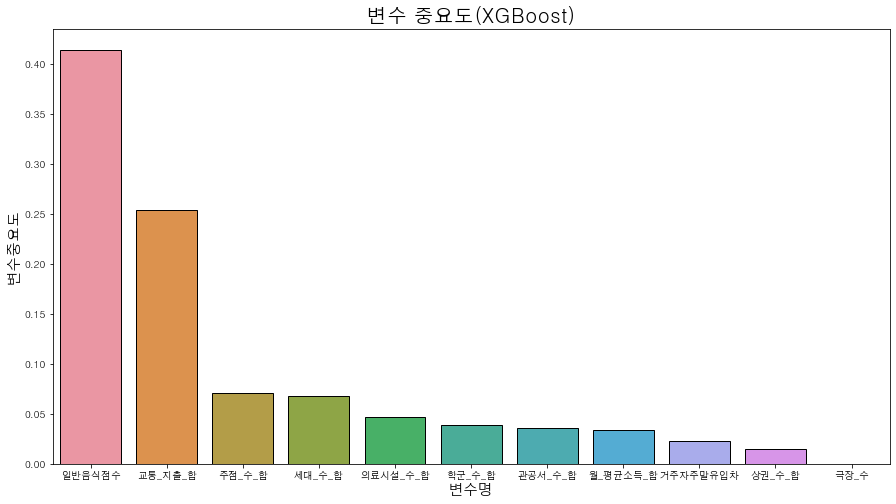

In [50]:
plt.figure(figsize = (15,8))
xgb_importance = grid_xgb.best_estimator_.feature_importances_
fname_list = []
for i,v in enumerate(xgb_importance):
    fname_list.append(scaled_df.columns[i])
    print('Feature Name: %0s, Feature Score: %.5f' % (scaled_df.columns[i],v))
xgb_imp_df = pd.DataFrame({'변수명' : fname_list, '중요도' : xgb_importance}).sort_values(by = '중요도')[::-1]
sns.barplot(xgb_imp_df.변수명, xgb_imp_df.중요도, edgecolor = (0,0,0))
plt.title('변수 중요도(XGBoost)', size = 20)
plt.ylabel('변수중요도', size = 15)
plt.xlabel('변수명', size = 15)
plt.show()

#### GradientBoosting 모델 사용

In [51]:
gbc = GradientBoostingRegressor(random_state = 2020)

In [52]:
gbc.fit(scaled_df, Y)

GradientBoostingRegressor(random_state=2020)

#### GradientBoosting GridSearchCV

In [53]:
gbc_params = {'max_depth' : [3,4,5,6,7], 'n_estimators' : [15,30,50,75,100], 'learning_rate' : [0.005, 0.015, 0.02, 0.1, 0.15],
             'criterion' : ['friedman_mse', 'mse', 'mae']}

In [54]:
grid_gbc = GridSearchCV(gbc, param_grid = gbc_params, cv = kfold, n_jobs = -1, scoring = 'neg_mean_absolute_error')

In [55]:
best_gbc = grid_gbc.fit(scaled_df, Y)

#### GradientBoosting 변수 중요도 탐색

Feature Name: 월_평균소득_합, Feature Score: 0.00351
Feature Name: 의료시설_수_합, Feature Score: 0.19646
Feature Name: 학군_수_합, Feature Score: 0.00117
Feature Name: 일반음식점수, Feature Score: 0.63266
Feature Name: 주점_수_합, Feature Score: 0.02045
Feature Name: 상권_수_합, Feature Score: 0.00444
Feature Name: 관공서_수_합, Feature Score: 0.07486
Feature Name: 극장_수, Feature Score: 0.00060
Feature Name: 거주자주말유입차, Feature Score: 0.00585
Feature Name: 세대_수_합, Feature Score: 0.04961
Feature Name: 교통_지출_합, Feature Score: 0.01039


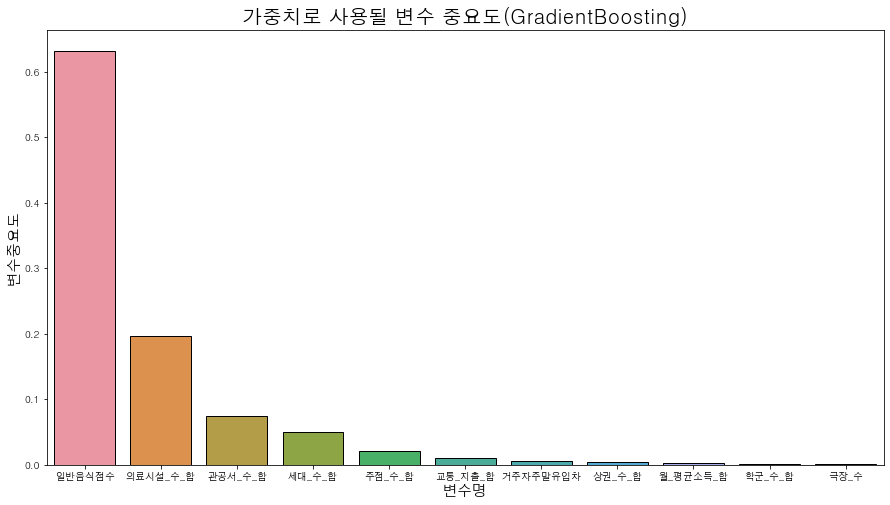

In [56]:
plt.figure(figsize = (15,8))
gbc_importance = grid_gbc.best_estimator_.feature_importances_
fname_list = []
for i,v in enumerate(gbc_importance):
    fname_list.append(scaled_df.columns[i])
    print('Feature Name: %0s, Feature Score: %.5f' % (scaled_df.columns[i],v))
gbc_imp_df = pd.DataFrame({'변수명' : fname_list, '중요도' : gbc_importance}).sort_values(by = '중요도')[::-1]
sns.barplot(gbc_imp_df.변수명, gbc_imp_df.중요도, edgecolor = (0,0,0))
plt.title('가중치로 사용될 변수 중요도(GradientBoosting)', size = 20)
plt.ylabel('변수중요도', size = 15)
plt.xlabel('변수명', size = 15)
plt.show()

#### 모델 성능 비교

In [57]:
print('거주자 우선 주차장 OLS 모델의 RMSE는 {}'.format(np.sqrt(-cv_reg.mean())))

거주자 우선 주차장 OLS 모델의 RMSE는 31.176932311282293


In [58]:
print('거주자 우선 주차장 의사결정나무 모델의 RMSE는 {}'.format(np.sqrt(-best_dt.best_score_)))

거주자 우선 주차장 의사결정나무 모델의 RMSE는 25.711765933272794


In [59]:
print('거주자 우선 주차장 랜덤포레스트 모델의 RMSE는 {}'.format(np.sqrt(-best_rf.best_score_)))

거주자 우선 주차장 랜덤포레스트 모델의 RMSE는 26.628853906547484


In [60]:
print('거주자 우선 주차장 XGBoost 모델의 RMSE는 {}'.format(np.sqrt(-best_xgb.best_score_)))

거주자 우선 주차장 XGBoost 모델의 RMSE는 23.992183804191708


In [61]:
print('거주자 우선 주차장 GradientBoosting 모델의 RMSE는 {}'.format(np.sqrt(-best_gbc.best_score_)))

거주자 우선 주차장 GradientBoosting 모델의 RMSE는 25.311935580576744


### XGBoost 모델을 채택한다.

### OLS의 회귀계수의 부호로 변수 중요도의 부호를 대체

In [62]:
lm = sm.OLS(Y, scaled_df)

In [63]:
results = lm.fit()

In [64]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 단속건수_합   R-squared (uncentered):                   0.249
Model:                            OLS   Adj. R-squared (uncentered):             -0.068
Method:                 Least Squares   F-statistic:                             0.7849
Date:                Wed, 19 Aug 2020   Prob (F-statistic):                       0.652
Time:                        20:36:03   Log-Likelihood:                         -346.66
No. Observations:                  37   AIC:                                      715.3
Df Residuals:                      26   BIC:                                      733.0
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
월_평균소득_합    -642.8733   1538.756     -0.418      0.680   -3805.831    2520.084
의료시설_수_합     638.1584   1432.208      0.446      0.660   -2305.787    3582.104
학군_수_합      -365.0042   1375.319     -0.265      0.793   -3192.013    2462.005
일반음식점수      1346.1702   1095.050      1.229      0.230    -904.737    3597.078
주점_수_합       352.4617   1057.387      0.333      0.742   -1821.029    2525.953
상권_수_합      -140.8085    983.184     -0.143      0.887   -2161.773    1880.156
관공서_수_합      329.8409    896.172      0.368      0.716   -1512.268    2171.950
극장_수         -86.3184    918.337     -0.094      0.926   -1973.988    1801.351
거주자주말유입차    -189.6266    914.768     -0.207      0.837   -2069.959    1690.705
세대_수_합      -311.2605    775.578     -0.401      0.691   -1905.484    1282.963
교통_지출_합      296.4915    670.637      0.442      0.662   -1082.024    1675.007
==============================================================================
Omnibus:                        5.489   Durbin-Watson:                   0.177
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                4.187
Skew:                           0.592   Prob(JB):                        0.123
Kurtosis:                       4.146   Cond. No.                         7.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
coef_df = results.params.reset_index(name = '회귀계수').rename(columns = {'index' : '변수명'})

In [66]:
coef_imp_df = pd.merge(xgb_imp_df, coef_df)

In [67]:
coef_imp_df['부호'] = [-1 if x <=0 else 1 for x in coef_imp_df.회귀계수] # 회귀계수가 음수인 변수는 중요도에 -1을 곱해준다.

In [68]:
coef_imp_df.중요도 = coef_imp_df.중요도 * coef_imp_df.부호

In [69]:
coef_imp_df

,변수명,중요도,회귀계수,부호
0,일반음식점수,0.414585,1346.170235,1
1,교통_지출_합,0.253742,296.491506,1
2,주점_수_합,0.071128,352.461654,1
3,세대_수_합,-0.067999,-311.260452,-1
4,의료시설_수_합,0.046521,638.158429,1
5,학군_수_합,-0.038732,-365.004248,-1
6,관공서_수_합,0.035848,329.840946,1
7,월_평균소득_합,-0.033683,-642.873253,-1
8,거주자주말유입차,-0.022838,-189.626590,-1
9,상권_수_합,-0.014735,-140.808457,-1


#### 3-1-2. 민영 주차장 데이터에 거주자 우선 주차장 모델 적용

In [70]:
target = pd.read_csv("test_거주주차장_최종.csv", encoding = 'cp949')

In [71]:
target['학군'] = target[['유치원_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수']].sum(axis = 1)
target['상권'] = target[['슈퍼마켓_수', '대규모점포_수']].sum(axis = 1)
target['의료시설'] = target[['종합병원_수','일반병원_수','약국_수']].sum(axis = 1)
target['교통인프라'] = target[['지하철역_수', '버스정류장_수']].sum(axis = 1)
target['주점'] = target[['유흥주점_수', '단란주점_수']].sum(axis = 1)

In [72]:
# max로 시작하는 변수 삭제
target.drop(target.columns[target.columns.str[:3] == 'max'], axis = 1, inplace = True)

In [73]:
target = target.loc[target.주차장명.str.contains('공영') == 0]
target.index = range(target.shape[0])

In [74]:
df = target.iloc[:, 4:]

In [75]:
df.drop(['유흥주점_수','호수_합', '단속건수_합','은행_수', 'sum의류_신발_지출', 'sum생활용품_지출', 'sum의료비_지출', '단란주점_수','집객시설_수', '종합병원_수','일반병원_수','약국_수', '유치원_수', '초등학교_수',
              '중학교_수', '고등학교_수', 'sum지출_총금액', '대학교_수', '슈퍼마켓_수', '대규모점포_수', '지하철역_수',
        '버스정류장_수', '종합병원_수', '일반병원_수', '약국_수', '숙박시설_수'], axis = 1, inplace = True)

In [76]:
df.columns = ['일반음식점수', '월_평균소득_합', '식료품_지출_합', '교통_지출_합', '여가_지출_합', '문화_지출_합', '교육_지출_합',
            '유흥_지출_합', '관공서_수_합', '극장_수', '거주자평일유입차', '거주자주말유입차', '세대_수_합', '학군_수_합',
            '상권_수_합', '의료시설_수_합','교통인프라_수_합', '주점_수_합']

In [77]:
df = df[X.columns]

In [78]:
scaled_df = pd.DataFrame(scaler.transform(df))
scaled_df.columns = df.columns
scaled_df = scaled_df[vif.features]

In [79]:
# 지수와 각 데이터 값들을 곱한후 더한다.
for num in range(scaled_df.shape[1]) :
    scaled_df.iloc[:, num] = scaled_df.iloc[:, num] * coef_imp_df.중요도[num]

In [80]:
scaled_df['지수'] = list(scaled_df.sum(axis = 1))

#### <font color='blue'> ★★★ 우선 개방 대상 10개 목록 ★★★

In [81]:
l_rank_df = pd.DataFrame({'주차장명' : list(target.loc[df.index].주차장명), '지수' : scaled_df.지수})

In [87]:
l_rank_df.sort_values(by = '지수', ascending = False)[:10]

,주차장명,지수
4,동화목동프라자 주차장,1.781058
33,홍익병원 목동관 주차장,1.198279
21,욱성빌딩 주차장,0.720026
1,GS타임즈 국민은행목동역주차장,0.653203
18,신월주차장,0.351087
20,우성상가 주차장,0.223726
22,정목주차장,-0.006372
24,청학빌딩 주차장,-0.034323
23,제일빌딩 주차장,-0.044705
11,보성주차장,-0.097930


In [83]:
# Qgis에서의 시각화를 위해 데이터 결합
final_rank = pd.merge(l_rank_df, target.loc[df.index][['주차장명','x','y']], how = 'left', on = '주차장명').sort_values(by = '지수', ascending = False)

In [84]:
final_rank['rank'] = range(1, l_rank_df.shape[0] + 1) # 순위를 0부터 시작이 아니라 1부터 시작

In [85]:
final_rank.to_csv('거주주차장_선정대상_standard.csv', index = False, encoding = 'cp949')

### 3-2. 방문자 우선 주차장용 모델링

#### 3-2-1. 기본 데이터 사용 모델

In [165]:
v_data = pd.read_csv("train_방문_최종.csv", encoding = 'cp949',thousands = ',')

In [166]:
v_data['학군'] = v_data[['sum유치원_수', 'sum초등학교_수', 'sum중학교_수', 'sum고등학교_수', 'sum대학교_수']].sum(axis = 1)
v_data['상권'] = v_data[['sum슈퍼마켓_수', '대규모점포_수']].sum(axis = 1)
v_data['의료시설'] = v_data[['sum종합병원_수','sum일반병원_수','sum약국_수']].sum(axis = 1)
v_data['교통인프라'] = v_data[['sum지하철역_수', 'sum버스정류장_수']].sum(axis = 1)
v_data['주점'] = v_data[['유흥주점_수', '단란주점_수']].sum(axis = 1)

In [167]:
v_data.drop(v_data.columns[v_data.columns.str[:3] == 'max'], axis = 1, inplace = True)

In [168]:
v_data.drop(['유흥주점_수', '단란주점_수','sum지출_총금액', '병원_수','sum집객시설_수', '의원_수','약국_수', 'sum유치원_수', 'sum초등학교_수','sum의류_신발_지출', 'sum생활용품_지출',
               'sum중학교_수', 'sum고등학교_수', 'sum교육_지출', 'sum숙박시설_수', 'sum대학교_수', 'sum슈퍼마켓_수', '대규모점포_수', 'sum지하철역_수', 'sum버스정류장_수',
            'sum종합병원_수', 'sum일반병원_수', 'sum약국_수', 'sum숙박시설_수'],
              axis = 1, inplace = True)

In [169]:
X = v_data.iloc[:, 4:].drop('단속건수_합', axis = 1)
Y = v_data.단속건수_합

In [170]:
X.columns = ['일반음식점수_합', '월_평균_소득_합', '식료품_지출_합', '의료비_지출_합', '교통_지출_합',
            '여가_지출_합', '문화_지출_합', '유흥_지출_합', '관공서_수_합', '은행_수_합','극장_수_합', '세대_수_합', '방문자평일유입차',
            '방문자주말유입차', '학군_수_합', '상권_수_합', '의료시설_수_합', '교통인프라_수_합', '주점_수_합']#,'물품구매_합']

In [171]:
X = X[sorted(X.columns)]

#### MinMaxScaler

In [191]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(X))
scaled_df.columns = X.columns

#### VIF 지수 확인

- VIF가 10이 넘는 변수 제거

In [192]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(scaled_df.values, i) for i in range(scaled_df.shape[1])]
vif["features"] = scaled_df.columns 

In [193]:
# vif가 10이 넘는 변수들이 있을때마다 vif가 가장 큰 변수를 제거해가면서 모든 변수가 vif가 10 이하일 때까지 진행
for c in range(len(vif)) :
    if vif.sort_values(by = 'VIF Factor')[::-1]['VIF Factor'].iloc[0] >= 10 :
        df = scaled_df[vif.sort_values(by = 'VIF Factor')[::-1][1:].features]
        vif = pd.DataFrame()
        vif["features"] = df.columns 
        vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    else :
        break

In [194]:
vif

,features,VIF Factor
0,a_16,8.491528
1,a_13,4.499962
2,a_0,2.994703
3,a_1,5.372168
4,a_8,4.341060
5,a_14,4.749995
6,a_17,2.823964
7,a_7,3.473411
8,a_6,2.688753
9,a_3,1.669337


In [195]:
scaled_df = scaled_df[vif.features]

In [196]:
kfold = KFold(n_splits = 4, random_state = 2020, shuffle = True) # 4-kfold 실행

#### OLS 모델 사용

In [197]:
lm = sm.OLS(Y, scaled_df)

In [198]:
results = lm.fit()

In [199]:
results.summary() # OLS 모델 결과 summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 단속건수_합   R-squared (uncentered):                   0.920
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              56.06
Date:                Thu, 20 Aug 2020   Prob (F-statistic):                    2.40e-23
Time:                        10:26:25   Log-Likelihood:                         -481.61
No. Observations:                  59   AIC:                                      983.2
Df Residuals:                      49   BIC:                                      1004.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
a_16        6695.3286    806.061      8.306      0.000    5075.488    8315.169
a_13       -1291.6876    591.252     -2.185      0.034   -2479.853    -103.522
a_0         2023.0320    592.549      3.414      0.001     832.261    3213.803
a_1         1179.4034    677.420      1.741      0.088    -181.923    2540.730
a_8        -1134.3077    474.621     -2.390      0.021   -2088.095    -180.520
a_14         690.0748    443.036      1.558      0.126    -200.240    1580.390
a_17         644.9723    576.623      1.119      0.269    -513.794    1803.739
a_7         -773.9290    534.319     -1.448      0.154   -1847.683     299.825
a_6         -779.5500    566.648     -1.376      0.175   -1918.272     359.172
a_3         -378.7765    481.388     -0.787      0.435   -1346.161     588.608
==============================================================================
Omnibus:                        1.039   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                1.029
Skew:                           0.299   Prob(JB):                        0.598
Kurtosis:                       2.752   Cond. No.                         9.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### LinearRegression(OLS) 모델 사용

In [200]:
lr_reg = LinearRegression()

In [110]:
lr_reg.fit(scaled_df, Y)

LinearRegression()

In [111]:
cv_reg = cross_val_score(lr_reg, scaled_df, Y, cv = kfold, n_jobs = -1, scoring= 'neg_mean_absolute_error')

#### 의사결정나무 모델 사용

In [112]:
dt = DecisionTreeRegressor(random_state = 2020)

In [113]:
dt.fit(scaled_df, Y) # 전체 데이터 학습

DecisionTreeRegressor(random_state=2020)

#### 의사결정나무 GridSearchCV

In [114]:
dt_params = {'max_depth' : [3,4,5,6,7,8,9], 'min_samples_split': range(1, 20)} # 하이퍼 파라미터인 'max_depth' 지정

In [115]:
grid_dt = GridSearchCV(dt, param_grid = dt_params, cv = kfold, n_jobs = -1, scoring = 'neg_mean_absolute_error')

In [116]:
best_dt = grid_dt.fit(scaled_df, Y)

#### 의사결정나무 변수 중요도 탐색

Feature Name: 일반음식점수_합, Feature Score: 0.57842
Feature Name: 은행_수_합, Feature Score: 0.06977
Feature Name: 관공서_수_합, Feature Score: 0.00515
Feature Name: 교통_지출_합, Feature Score: 0.13871
Feature Name: 세대_수_합, Feature Score: 0.01480
Feature Name: 의료비_지출_합, Feature Score: 0.02042
Feature Name: 주점_수_합, Feature Score: 0.12886
Feature Name: 상권_수_합, Feature Score: 0.00444
Feature Name: 방문자평일유입차, Feature Score: 0.03898
Feature Name: 극장_수_합, Feature Score: 0.00045


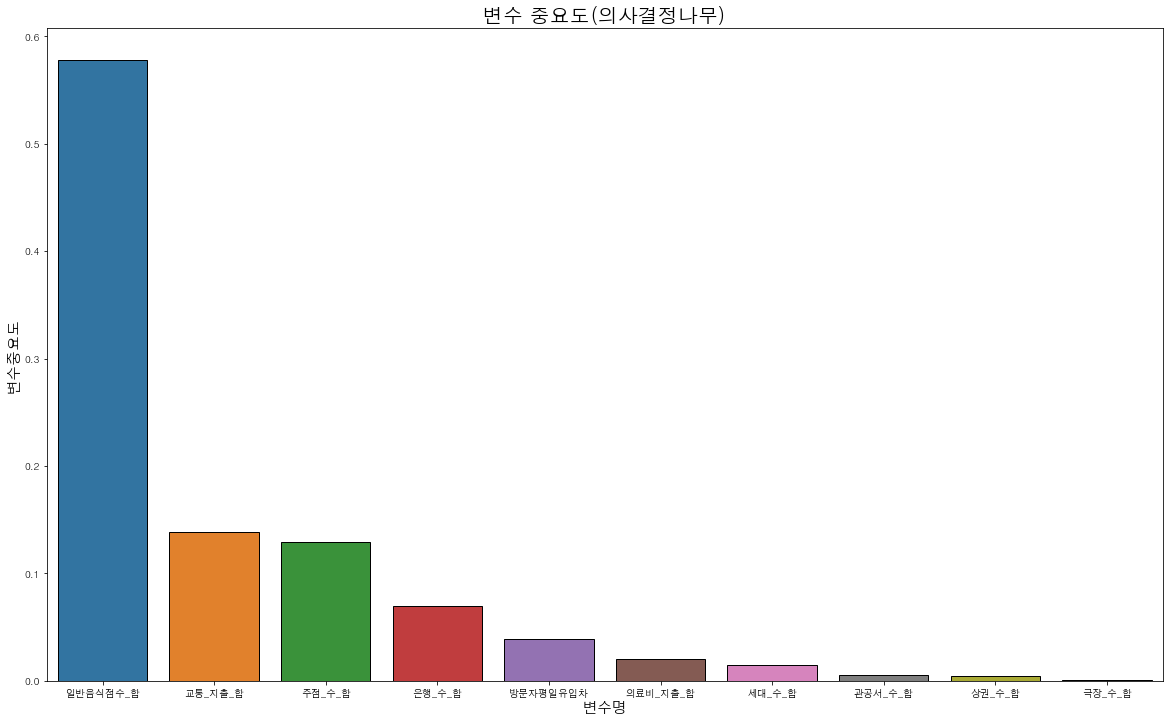

In [117]:
plt.figure(figsize = (20,12))
dt_importance = grid_dt.best_estimator_.feature_importances_
fname_list = []
for i,v in enumerate(dt_importance):
    fname_list.append(scaled_df.columns[i])
    print('Feature Name: %0s, Feature Score: %.5f' % (scaled_df.columns[i],v))
dt_imp_df = pd.DataFrame({'변수명' : fname_list, '중요도' : dt_importance}).sort_values(by = '중요도')[::-1]
sns.barplot(dt_imp_df.변수명, dt_imp_df.중요도, edgecolor = (0,0,0))
plt.title('변수 중요도(의사결정나무)', size = 20)
plt.ylabel('변수중요도', size = 15)
plt.xlabel('변수명', size = 15)
plt.show()

#### 랜덤포레스트 모델 사용

In [118]:
rf = RandomForestRegressor(random_state = 2020)

In [119]:
rf.fit(scaled_df, Y)

RandomForestRegressor(random_state=2020)

#### 랜덤포레스트 GridSearchCV

In [120]:
rf_params = {'max_depth' : [3,4,5,6,7], 'n_estimators' : [15,25,30,45, 50,75,100, 150]} # 하이퍼 파라미터인 'max_depth', 'n_estimators' 지정

In [121]:
grid_rf = GridSearchCV(rf, param_grid = rf_params, cv = kfold, n_jobs = -1, scoring = 'neg_mean_absolute_error')

In [122]:
best_rf = grid_rf.fit(scaled_df, Y)

#### 랜덤포레스트 변수 중요도 탐색

Feature Name: 일반음식점수_합, Feature Score: 0.63946
Feature Name: 은행_수_합, Feature Score: 0.03670
Feature Name: 관공서_수_합, Feature Score: 0.04455
Feature Name: 교통_지출_합, Feature Score: 0.04177
Feature Name: 세대_수_합, Feature Score: 0.02657
Feature Name: 의료비_지출_합, Feature Score: 0.07412
Feature Name: 주점_수_합, Feature Score: 0.10317
Feature Name: 상권_수_합, Feature Score: 0.00796
Feature Name: 방문자평일유입차, Feature Score: 0.02170
Feature Name: 극장_수_합, Feature Score: 0.00400


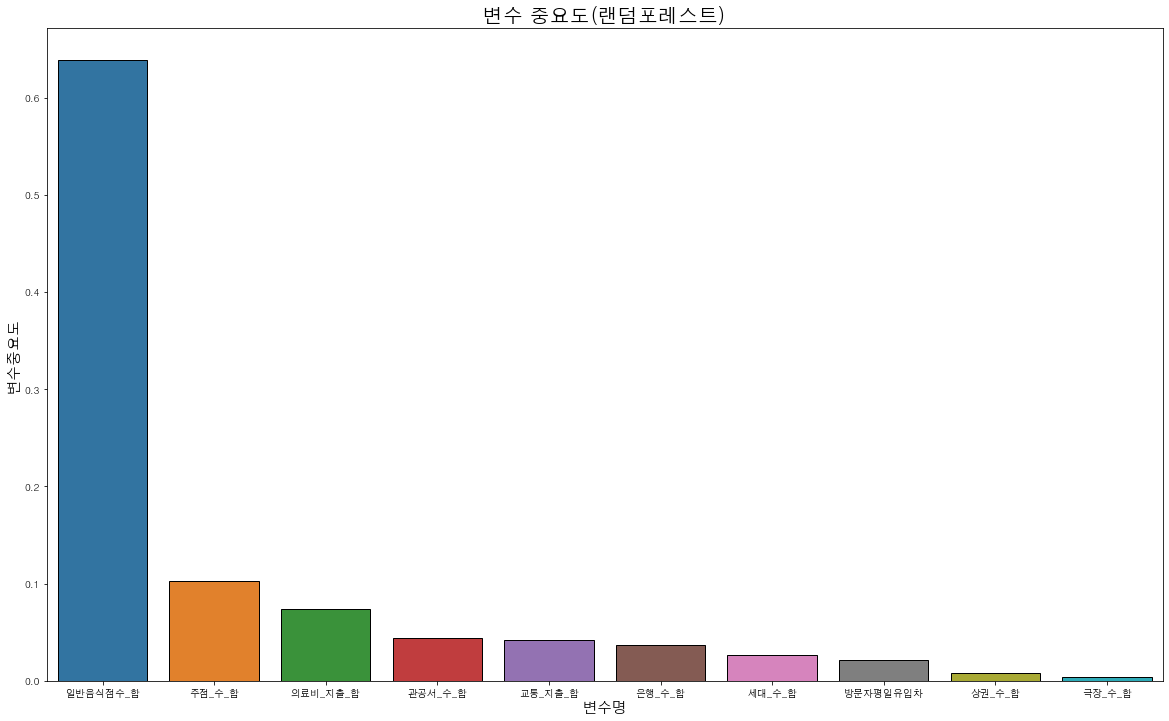

In [123]:
plt.figure(figsize = (20,12))
rf_importance = grid_rf.best_estimator_.feature_importances_
fname_list = []
for i,v in enumerate(rf_importance):
    fname_list.append(scaled_df.columns[i])
    print('Feature Name: %0s, Feature Score: %.5f' % (scaled_df.columns[i],v))
rf_imp_df = pd.DataFrame({'변수명' : fname_list, '중요도' : rf_importance}).sort_values(by = '중요도')[::-1]
sns.barplot(rf_imp_df.변수명, rf_imp_df.중요도, edgecolor = (0,0,0))
plt.title('변수 중요도(랜덤포레스트)', size = 20)
plt.ylabel('변수중요도', size = 15)
plt.xlabel('변수명', size = 15)
plt.show()

#### XGBoost 모델 사용

In [124]:
xgb = XGBRegressor(random_state = 2020)

In [125]:
xgb.fit(scaled_df, Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### XGBoost GridSearchCV

In [126]:
xgb_params = {'max_depth' : [3,4,5,6,7], 'n_estimators' : [15,30,50,75,100],
             'eta' : [0.005, 0.015, 0.05, 0.1, 0.2]}

In [127]:
grid_xgb = GridSearchCV(xgb, param_grid = xgb_params, cv = kfold, n_jobs = -1, scoring = 'neg_mean_absolute_error')

In [128]:
best_xgb = grid_xgb.fit(scaled_df, Y)

#### XGBoost 변수 중요도 탐색

Feature Name: 일반음식점수_합, Feature Score: 0.27543
Feature Name: 은행_수_합, Feature Score: 0.12507
Feature Name: 관공서_수_합, Feature Score: 0.04777
Feature Name: 교통_지출_합, Feature Score: 0.10729
Feature Name: 세대_수_합, Feature Score: 0.08520
Feature Name: 의료비_지출_합, Feature Score: 0.20766
Feature Name: 주점_수_합, Feature Score: 0.07236
Feature Name: 상권_수_합, Feature Score: 0.01027
Feature Name: 방문자평일유입차, Feature Score: 0.02950
Feature Name: 극장_수_합, Feature Score: 0.03945


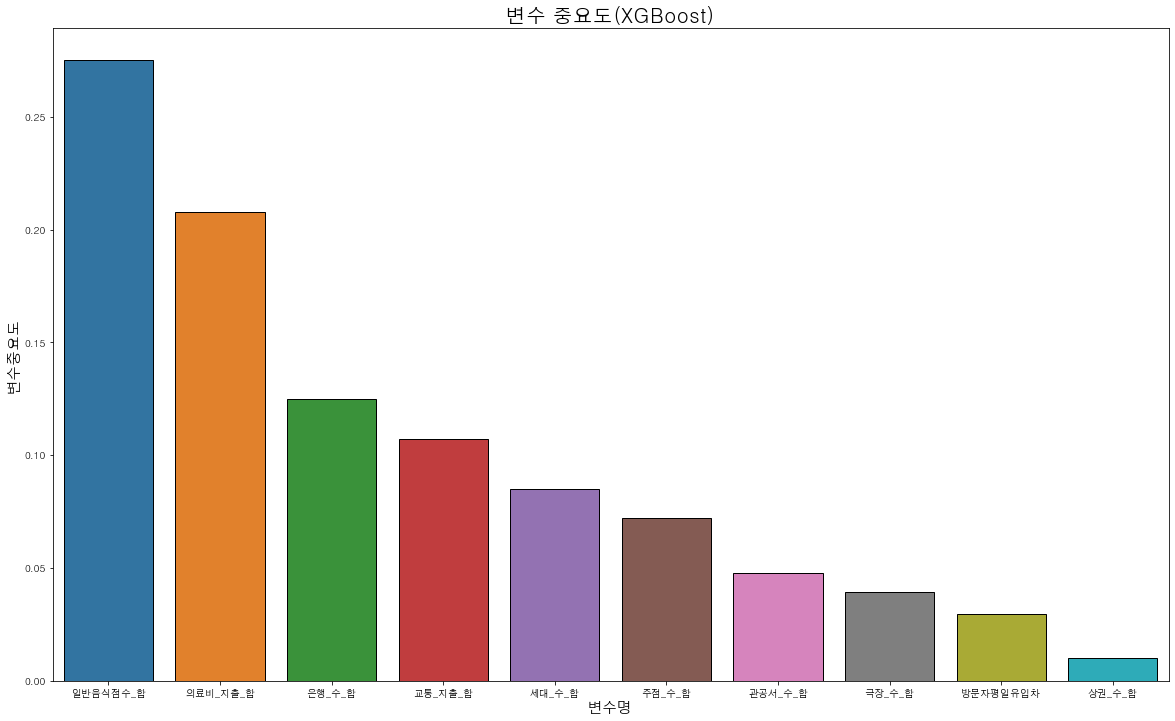

In [129]:
plt.figure(figsize = (20,12))
xgb_importance = grid_xgb.best_estimator_.feature_importances_
fname_list = []
for i,v in enumerate(xgb_importance):
    fname_list.append(scaled_df.columns[i])
    print('Feature Name: %0s, Feature Score: %.5f' % (scaled_df.columns[i],v))
xgb_imp_df = pd.DataFrame({'변수명' : fname_list, '중요도' : xgb_importance}).sort_values(by = '중요도')[::-1]
sns.barplot(xgb_imp_df.변수명, xgb_imp_df.중요도, edgecolor = (0,0,0))
plt.title('변수 중요도(XGBoost)', size = 20)
plt.ylabel('변수중요도', size = 15)
plt.xlabel('변수명', size = 15)
plt.show()

#### GradientBoosting 모델 사용

In [130]:
gbc = GradientBoostingRegressor(random_state = 2020)

In [131]:
gbc.fit(scaled_df, Y)

GradientBoostingRegressor(random_state=2020)

#### GradientBoosting GridSearchCV

In [132]:
gbc_params = {'max_depth' : [3,4,5,6,7], 'n_estimators' : [15,30,50,75,100], 'learning_rate' : [0.005, 0.015, 0.02, 0.1, 0.15],
             'criterion' : ['friedman_mse', 'mse', 'mae']}

In [133]:
grid_gbc = GridSearchCV(gbc, param_grid = gbc_params, cv = kfold, n_jobs = -1, scoring = 'neg_mean_absolute_error')

In [134]:
best_gbc = grid_gbc.fit(scaled_df, Y)

#### GradientBoosting 변수 중요도 탐색

Feature Name: 일반음식점수_합, Feature Score: 0.60017
Feature Name: 은행_수_합, Feature Score: 0.08042
Feature Name: 관공서_수_합, Feature Score: 0.03297
Feature Name: 교통_지출_합, Feature Score: 0.10549
Feature Name: 세대_수_합, Feature Score: 0.02447
Feature Name: 의료비_지출_합, Feature Score: 0.03829
Feature Name: 주점_수_합, Feature Score: 0.08770
Feature Name: 상권_수_합, Feature Score: 0.01072
Feature Name: 방문자평일유입차, Feature Score: 0.01741
Feature Name: 극장_수_합, Feature Score: 0.00236


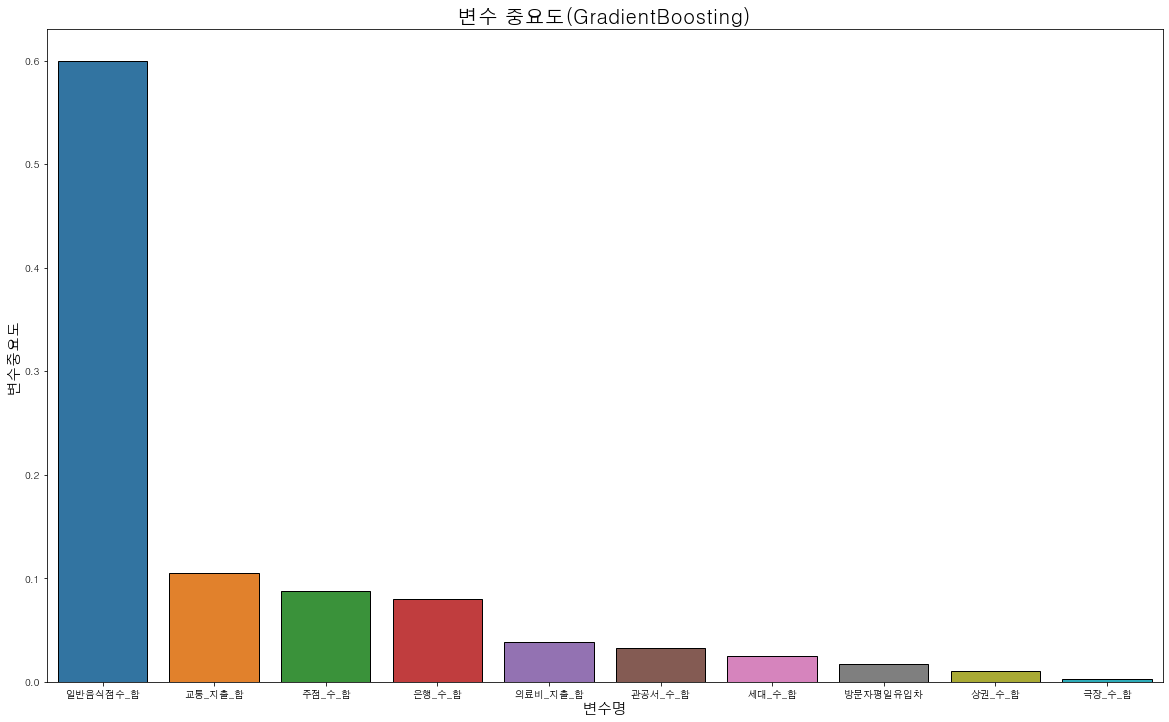

In [136]:
plt.figure(figsize = (20,12))
gbc_importance = grid_gbc.best_estimator_.feature_importances_
fname_list = []
for i,v in enumerate(gbc_importance):
    fname_list.append(scaled_df.columns[i])
    print('Feature Name: %0s, Feature Score: %.5f' % (scaled_df.columns[i],v))
gbc_imp_df = pd.DataFrame({'변수명' : fname_list, '중요도' : gbc_importance}).sort_values(by = '중요도')[::-1]
sns.barplot(gbc_imp_df.변수명, gbc_imp_df.중요도, edgecolor = (0,0,0))
plt.title('변수 중요도(GradientBoosting)', size = 20)
plt.ylabel('변수중요도', size = 15)
plt.xlabel('변수명', size = 15)
plt.show()

#### 모델 성능 비교

In [137]:
print('거주자 우선 주차장 OLS 모델의 RMSE는 {}'.format(np.sqrt(-cv_reg.mean())))

거주자 우선 주차장 OLS 모델의 RMSE는 29.82737506055909


In [138]:
print('방문자 우선 주차장 의사결정나무 모델의 RMSE는 {}'.format(np.sqrt(-best_dt.best_score_)))

방문자 우선 주차장 의사결정나무 모델의 RMSE는 26.69919890600132


In [139]:
print('방문자 우선 주차장 랜덤포레스트 모델의 RMSE는 {}'.format(np.sqrt(-best_rf.best_score_)))

방문자 우선 주차장 랜덤포레스트 모델의 RMSE는 24.415754481640988


In [140]:
print('방문자 우선 주차장 XGBoost 모델의 RMSE는 {}'.format(np.sqrt(-best_xgb.best_score_)))

방문자 우선 주차장 XGBoost 모델의 RMSE는 24.05505176476584


In [141]:
print('거주자 우선 주차장 GradientBoosting 모델의 RMSE는 {}'.format(np.sqrt(-best_gbc.best_score_)))

거주자 우선 주차장 GradientBoosting 모델의 RMSE는 23.030134750107628


### GradientBoosting 모델을 채택한다.

### OLS의 회귀계수 부호로 변수중요도의 부호를 대체

In [142]:
lm = sm.OLS(Y, scaled_df)

In [143]:
results = lm.fit()

In [144]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 단속건수_합   R-squared (uncentered):                   0.920
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              56.06
Date:                Thu, 20 Aug 2020   Prob (F-statistic):                    2.40e-23
Time:                        10:14:18   Log-Likelihood:                         -481.61
No. Observations:                  59   AIC:                                      983.2
Df Residuals:                      49   BIC:                                      1004.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
일반음식점수_합    6695.3286    806.061      8.306      0.000    5075.488    8315.169
은행_수_합     -1291.6876    591.252     -2.185      0.034   -2479.853    -103.522
관공서_수_합     2023.0320    592.549      3.414      0.001     832.261    3213.803
교통_지출_합     1179.4034    677.420      1.741      0.088    -181.923    2540.730
세대_수_합     -1134.3077    474.621     -2.390      0.021   -2088.095    -180.520
의료비_지출_합     690.0748    443.036      1.558      0.126    -200.240    1580.390
주점_수_합       644.9723    576.623      1.119      0.269    -513.794    1803.739
상권_수_합      -773.9290    534.319     -1.448      0.154   -1847.683     299.825
방문자평일유입차    -779.5500    566.648     -1.376      0.175   -1918.272     359.172
극장_수_합      -378.7765    481.388     -0.787      0.435   -1346.161     588.608
==============================================================================
Omnibus:                        1.039   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                1.029
Skew:                           0.299   Prob(JB):                        0.598
Kurtosis:                       2.752   Cond. No.                         9.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
coef_df = results.params.reset_index(name = '회귀계수').rename(columns = {'index' : '변수명'})

In [146]:
coef_imp_df = pd.merge(gbc_imp_df, coef_df)

In [147]:
coef_imp_df['부호'] = [-1 if x <=0 else 1 for x in coef_imp_df.회귀계수] # 회귀계수가 음수인 변수는 중요도에 -1을 곱해준다.

In [148]:
coef_imp_df.중요도 = coef_imp_df.중요도 * coef_imp_df.부호

In [149]:
coef_imp_df

,변수명,중요도,회귀계수,부호
0,일반음식점수_합,0.600174,6695.328642,1
1,교통_지출_합,0.105494,1179.403423,1
2,주점_수_합,0.087696,644.972253,1
3,은행_수_합,-0.080418,-1291.687614,-1
4,의료비_지출_합,0.038287,690.074829,1
5,관공서_수_합,0.032973,2023.031995,1
6,세대_수_합,-0.024470,-1134.307722,-1
7,방문자평일유입차,-0.017410,-779.550034,-1
8,상권_수_합,-0.010721,-773.928986,-1
9,극장_수_합,-0.002356,-378.776486,-1


#### 3-2-2. 민영 주차장 데이터에 방문자 우선 주차장 모델 적용

In [150]:
target = pd.read_csv("test_방문주차장_최종.csv", encoding = 'cp949')

In [151]:
target['학군'] = target[['sum유치원_수', 'sum초등학교_수', 'sum중학교_수', 'sum고등학교_수', 'sum대학교_수']].sum(axis = 1)
target['상권'] = target[['sum슈퍼마켓_수', '대규모점포_수']].sum(axis = 1)
target['의료시설'] = target[['sum종합병원_수','sum일반병원_수','sum약국_수']].sum(axis = 1)
target['교통인프라'] = target[['sum지하철역_수', 'sum버스정류장_수']].sum(axis = 1)
target['주점'] = target[['유흥주점_수', '단란주점_수']].sum(axis = 1)

In [152]:
target.drop(target.columns[target.columns.str[:3] == 'max'], axis = 1, inplace = True)

In [153]:
target.drop(['호수_합', '단속건수_합', '유흥주점_수', '단란주점_수', 'sum지출_총금액', '병원_수','sum집객시설_수', '의원_수','약국_수', 'sum유치원_수', 'sum초등학교_수','sum의류_신발_지출', 'sum생활용품_지출',
               'sum중학교_수', 'sum고등학교_수', 'sum교육_지출', 'sum숙박시설_수', 'sum대학교_수', 'sum슈퍼마켓_수', '대규모점포_수', 'sum지하철역_수', 'sum버스정류장_수',
            'sum종합병원_수', 'sum일반병원_수', 'sum약국_수', 'sum숙박시설_수'],
              axis = 1, inplace = True)

In [154]:
df = target.loc[target.주차장명.str.contains('공영') != 1].iloc[:, 4:]

In [155]:
df.columns = ['일반음식점수_합', '월_평균_소득_합', '식료품_지출_합', '의료비_지출_합', '교통_지출_합','여가_지출_합', '문화_지출_합',
              '유흥_지출_합', '관공서_수_합','은행_수_합',  '극장_수_합', '세대_수_합', '방문자평일유입차','방문자주말유입차',
              '학군_수_합', '상권_수_합', '의료시설_수_합', '교통인프라_수_합', '주점_수_합']

In [156]:
df = df[sorted(df.columns)]

In [157]:
scaled_df = pd.DataFrame(scaler.transform(df))
scaled_df.columns = df.columns
scaled_df = scaled_df[vif.features]

In [158]:
# 지수와 각 데이터 값들을 곱한후 더한다.
for num in range(scaled_df.shape[1]) :
    scaled_df.iloc[:, num] = scaled_df.iloc[:, num] * coef_imp_df.중요도[num]

In [159]:
scaled_df['지수'] = list(scaled_df.sum(axis = 1))

#### <font color='blue'> ★★★ 우선 개방 대상 10개 목록 ★★★

In [160]:
v_rank_df = pd.DataFrame({'주차장명' : list(target.loc[df.index].주차장명), '지수' : scaled_df.지수})

In [161]:
v_rank_df.sort_values(by = '지수', ascending = False)[:10]

,주차장명,지수
63,정산빌딩 주차장,0.870749
46,현대백화점 목동점 주차장,0.844951
40,청학빌딩 주차장,0.817925
1,GS타임즈 국민은행목동역주차장,0.783184
5,대경프라자 주차장,0.721585
31,썬택씨티빌딩 주차장,0.685616
39,제일빌딩 주차장,0.655196
6,동신한방병원 주차장,0.619269
0,CBS기독교방송빌딩 주차장,0.555662
55,"신정1,3동복개주차장",0.535353


In [162]:
# Qgis에서의 시각화를 위해 데이터 결합
final_rank = pd.merge(v_rank_df, target.loc[df.index][['주차장명','x','y']], how = 'left', on = '주차장명').sort_values(by = '지수', ascending = False)

In [163]:
final_rank['rank'] = range(1, v_rank_df.shape[0] + 1)

In [164]:
final_rank.to_csv('방문주차장_선정대상_minmax.csv', index = False, encoding = 'cp949')

# Finished..!
## 감사합니다.